In [34]:
# to load json files
#import json
# datetime oprations
from datetime import timedelta
# to get web contents
from urllib.request import urlopen
# for numerical analyiss
import numpy as np
# to store and process data in dataframe
import pandas as pd
# basic visualization package
import matplotlib.pyplot as plt
# advanced ploting
import seaborn as sns
# interactive visualization
import plotly.express as px
import plotly.graph_objs as go
# import plotly.figure_factory as ff
from plotly.subplots import make_subplots

In [35]:
#change in CPI of 4 countries:


CPI_change = pd.read_csv('//Users/yufeizhao/Desktop/440-Project/Country_CPI_Change.csv')
CPI_change['Date'] = pd.to_datetime(CPI_change['Date'])

CPI_change.head()


,Date,Country,CPI_food_change
0,2019-01-01,China,1.1
1,2019-02-01,China,2.3
2,2019-03-01,China,-0.6
3,2019-04-01,China,0.0
4,2019-05-01,China,0.1


In [36]:
print(CPI_change)

          Date        Country  CPI_food_change
0   2019-01-01          China              1.1
1   2019-02-01          China              2.3
2   2019-03-01          China             -0.6
3   2019-04-01          China              0.0
4   2019-05-01          China              0.1
..         ...            ...              ...
127 2021-05-01  United States              1.8
128 2021-06-01  United States              3.7
129 2021-07-01  United States              1.3
130 2021-08-01  United States              0.2
131 2021-09-01  United States              2.3

[132 rows x 3 columns]


In [37]:
# Over the time

fig = px.choropleth(CPI_change, locations='Country', 
                    color='CPI_food_change',
                    locationmode='country names', hover_name='Country',
                    animation_frame=CPI_change["Date"].dt.strftime('%Y-%m'),
                    range_color=[-5, 5],
                    title='CPI change over time', color_continuous_scale=[[0, 'White'],[1, 'Black']])
#fig.update(layout_coloraxis_showscale=False)
fig.show()

China Dataset Regression

In [38]:
China_CPI_Covid = pd.read_csv('//Users/yufeizhao/Desktop/440-Project/China_Dataset_1.csv')

print(China_CPI_Covid)

   Unnamed: 0  Unnamed: 1  general food                 meat  vegetables  \
0         NaN         NaN           NaN  *pork, beef, mutton         NaN   
1         NaN         NaN           NaN                  NaN         NaN   
2      2019/1         NaN           1.1                -0.10        9.10   
3      2019/2         NaN           2.3                 0.90       15.70   
4      2019/3         NaN          -0.6                -0.10       -2.60   
5      2019/4         NaN           0.0                 0.90       -4.50   
6      2019/5         NaN           0.1                -0.20       -7.90   
7      2019/6         NaN          -0.2                 2.20       -9.70   
8      2019/7         NaN           1.0                  8.6       -3.45   
9      2019/8         NaN           2.2                15.00        2.80   
10     2019/9         NaN           2.6                15.00       -2.40   
11    2019/10         NaN           2.7                14.70       -1.70   
12    2019/1

General_Food: the percent change in CPI of general food in the month compared to last month
meat: the percent change in CPI of meat in the month compared to last month
vegetable: the percent change in CPI of vegetable in the month compared to last month
fruits: the percent change in CPI of fruits in the month compared to last month
cereals: the percent change in CPI of cereals in the month compared to last month
dairy_product_eggs: the percent change in dairy products and eggs of general food in the month compared to last month
oil: the percent change in CPI of oil in the month compared to last month
seafood: the percent change in CPI of seafood in the month compared to last month

total_confirmed_death: all confirmed covid deaths
total_confirmed_cases: all confirmed covid cases
month_confirmed_cases: all confirmed covid cases in the month
month_confirmed_death: all confirmed covid death in the month
percent_change_in_month_cases: the percent change in number of confirmed covid cases in the month compared to last month in numeric values, ie: 1 is 100%
percent_change_in_month_death: the percent change in number of confirmed covid death in the month compared to last month in numeric values, ie: 1 is 100%


In [39]:
China_CPI_Covid.columns=['Date','Empty1','General_Food','meat','vegetable','fruits','cereals','dairy_products_eggs','oil','seafood','Empty2','Empty3','total_confirmed_death','total_confirmed_cases','month_confirmed_cases','percent_change_in_month_cases','month_confirmed_death','percent_change_in_month_death', 'log_month_cases', 'log_month_death', 'Empty4','Empty5','Empty6']

#China_CPI_Covid.head()

China_CPI_Covid=China_CPI_Covid.drop(['Empty1', 'Empty2', 'Empty3','Empty4','Empty5','Empty6'], axis=1)
China_CPI_Covid=China_CPI_Covid.drop([0,1])

China_CPI_Covid.head()


,Date,General_Food,meat,vegetable,fruits,cereals,dairy_products_eggs,oil,seafood,total_confirmed_death,total_confirmed_cases,month_confirmed_cases,percent_change_in_month_cases,month_confirmed_death,percent_change_in_month_death,log_month_cases,log_month_death
2,2019/1,1.1,-0.10,9.1,2.3,0.1,0.25,-0.2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2019/2,2.3,0.90,15.7,5.4,0.2,-2.40,-0.1,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2019/3,-0.6,-0.10,-2.6,0.3,0.0,-2.55,0.0,-3.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2019/4,0.0,0.90,-4.5,2.6,0.0,1.20,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2019/5,0.1,-0.20,-7.9,10.1,0.0,3.10,0.0,-0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
#China_CPI_Covid['Date'] = pd.to_datetime(China_CPI_Covid['Date']).dt.to_period('m')
China_CPI_Covid['Date'] = pd.to_datetime(China_CPI_Covid['Date'])
China_CPI_Covid = China_CPI_Covid.set_index('Date')


In [41]:
China_CPI_Covid.head()

,General_Food,meat,vegetable,fruits,cereals,dairy_products_eggs,oil,seafood,total_confirmed_death,total_confirmed_cases,month_confirmed_cases,percent_change_in_month_cases,month_confirmed_death,percent_change_in_month_death,log_month_cases,log_month_death
Date,,,,,,,,,,,,,,,,
2019-01-01,1.1,-0.10,9.1,2.3,0.1,0.25,-0.2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-02-01,2.3,0.90,15.7,5.4,0.2,-2.40,-0.1,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-03-01,-0.6,-0.10,-2.6,0.3,0.0,-2.55,0.0,-3.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-04-01,0.0,0.90,-4.5,2.6,0.0,1.20,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-05-01,0.1,-0.20,-7.9,10.1,0.0,3.10,0.0,-0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:xlabel='Date'>

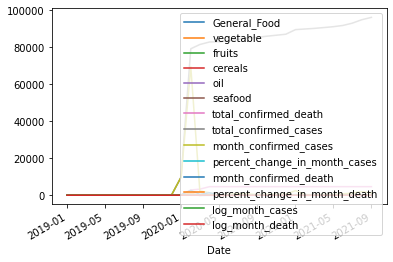

In [42]:
China_CPI_Covid.plot()

Text(0, 0.5, 'CPI')

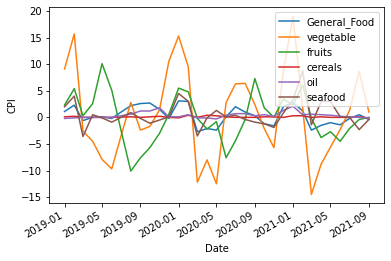

In [43]:
China_select_food = China_CPI_Covid[['General_Food','meat','vegetable','fruits','cereals','oil','seafood','dairy_products_eggs']]

China_select_food.plot()
plt.ylabel("CPI")

In [44]:
print(China_select_food)

            General_Food   meat  vegetable  fruits  cereals  oil  seafood  \
Date                                                                        
2019-01-01           1.1  -0.10       9.10     2.3     0.10 -0.2      2.0   
2019-02-01           2.3   0.90      15.70     5.4     0.20 -0.1      4.0   
2019-03-01          -0.6  -0.10      -2.60     0.3     0.00  0.0     -3.6   
2019-04-01           0.0   0.90      -4.50     2.6     0.00  0.0      0.5   
2019-05-01           0.1  -0.20      -7.90    10.1     0.00  0.0     -0.1   
2019-06-01          -0.2   2.20      -9.70     5.1     0.00  0.0     -0.9   
2019-07-01           1.0    8.6      -3.45    -2.5     0.05  0.3      0.0   
2019-08-01           2.2  15.00       2.80   -10.1     0.10  0.6      0.9   
2019-09-01           2.6  15.00      -2.40    -7.6     0.00  1.2     -0.2   
2019-10-01           2.7  14.70      -1.70    -5.7     0.10  1.2     -1.1   
2019-11-01           1.5   4.80       1.40    -3.0     0.20  1.8     -0.5   

In [45]:
China_select_covid_food = China_select_food.drop(China_select_food.index[range(12)])
China_select_covid_food = China_select_covid_food.drop(China_select_covid_food.index[[21,22,23]])
print(China_select_covid_food)

            General_Food   meat  vegetable  fruits  cereals  oil  seafood  \
Date                                                                        
2020-01-01           3.1   6.10       15.3     5.5     -0.1  0.1      4.5   
2020-02-01           3.0   7.10        9.5     4.8      0.4  0.5      3.0   
2020-03-01          -2.7  -5.20      -12.2    -0.2      0.0 -0.1     -3.5   
2020-04-01          -2.1  -5.50       -8.0    -2.2      0.4 -0.1     -0.1   
2020-05-01          -2.4  -5.70      -12.5    -0.8      0.3 -0.3      1.3   
2020-06-01           0.1   2.20        2.8    -7.6      0.1  0.4      0.1   
2020-07-01           2.0   7.40        6.3    -4.4      0.0  0.7      0.4   
2020-08-01           1.0   1.40        6.4    -0.4      0.0  0.7     -0.4   
2020-09-01           0.3  -0.80        2.4     7.3      0.0  0.3     -0.9   
2020-10-01          -1.2  -4.50       -2.1     1.8      0.1  0.5     -1.2   
2020-11-01          -1.6  -4.70       -5.7     0.0      0.1  0.2     -1.9   

<AxesSubplot:xlabel='Date'>

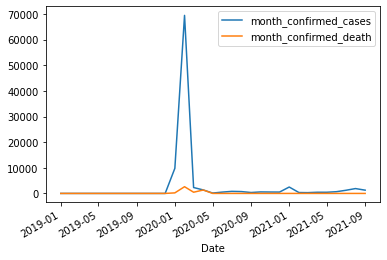

In [46]:
China_select_covid_month = China_CPI_Covid[['month_confirmed_cases', 'month_confirmed_death']]

China_select_covid_month.plot()

Text(0, 0.5, 'log numbers of monthyly cases and death')

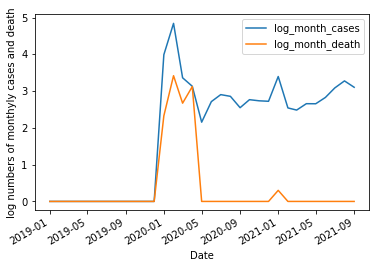

In [47]:
China_select_covid_month = China_CPI_Covid[['log_month_cases', 'log_month_death']]

China_select_covid_month.plot()

plt.ylabel("log numbers of monthyly cases and death")

In [48]:
China_CPI_Covid.shape

(36, 16)

In [49]:
China_CPI_Covid.columns

Index(['General_Food', 'meat', 'vegetable', 'fruits', 'cereals',
       'dairy_products_eggs', 'oil', 'seafood', 'total_confirmed_death',
       'total_confirmed_cases', 'month_confirmed_cases',
       'percent_change_in_month_cases', 'month_confirmed_death',
       'percent_change_in_month_death', 'log_month_cases', 'log_month_death'],
      dtype='object')

China_CPI_Covid_selected: contains all data since 2020-01-01

In [50]:
China_CPI_Covid_selected = China_CPI_Covid.drop(China_CPI_Covid.index[range(12)])
China_CPI_Covid_selected = China_CPI_Covid_selected.drop(China_CPI_Covid_selected.index[[21,22,23]])
print(China_CPI_Covid_selected)


            General_Food   meat  vegetable  fruits  cereals  \
Date                                                          
2020-01-01           3.1   6.10       15.3     5.5     -0.1   
2020-02-01           3.0   7.10        9.5     4.8      0.4   
2020-03-01          -2.7  -5.20      -12.2    -0.2      0.0   
2020-04-01          -2.1  -5.50       -8.0    -2.2      0.4   
2020-05-01          -2.4  -5.70      -12.5    -0.8      0.3   
2020-06-01           0.1   2.20        2.8    -7.6      0.1   
2020-07-01           2.0   7.40        6.3    -4.4      0.0   
2020-08-01           1.0   1.40        6.4    -0.4      0.0   
2020-09-01           0.3  -0.80        2.4     7.3      0.0   
2020-10-01          -1.2  -4.50       -2.1     1.8      0.1   
2020-11-01          -1.6  -4.70       -5.7     0.0      0.1   
2020-12-01           2.0   4.30        8.5     3.5      0.0   
2021-01-01           2.8   3.70       19.0     2.3      0.3   
2021-02-01           1.2  -1.00        1.8     6.1     

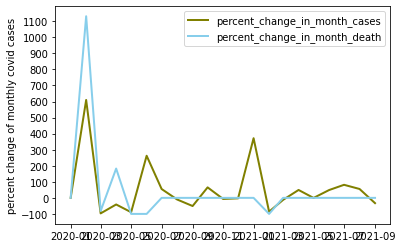

In [51]:
plt.plot('percent_change_in_month_cases', data=China_CPI_Covid_selected, color='olive', linewidth=2)
plt.plot('percent_change_in_month_death', data=China_CPI_Covid_selected, color='skyblue', linewidth=2)
plt.yticks(np.arange(-100, 1200, step=100))  # Set label locations.
plt.ylabel("percent change of monthly covid cases")
plt.legend()
plt.show()

In [52]:
China_CPI_Covid_selected.meat=pd.to_numeric(China_CPI_Covid_selected.meat)
China_CPI_Covid_selected.dairy_products_eggs=pd.to_numeric(China_CPI_Covid_selected.dairy_products_eggs)

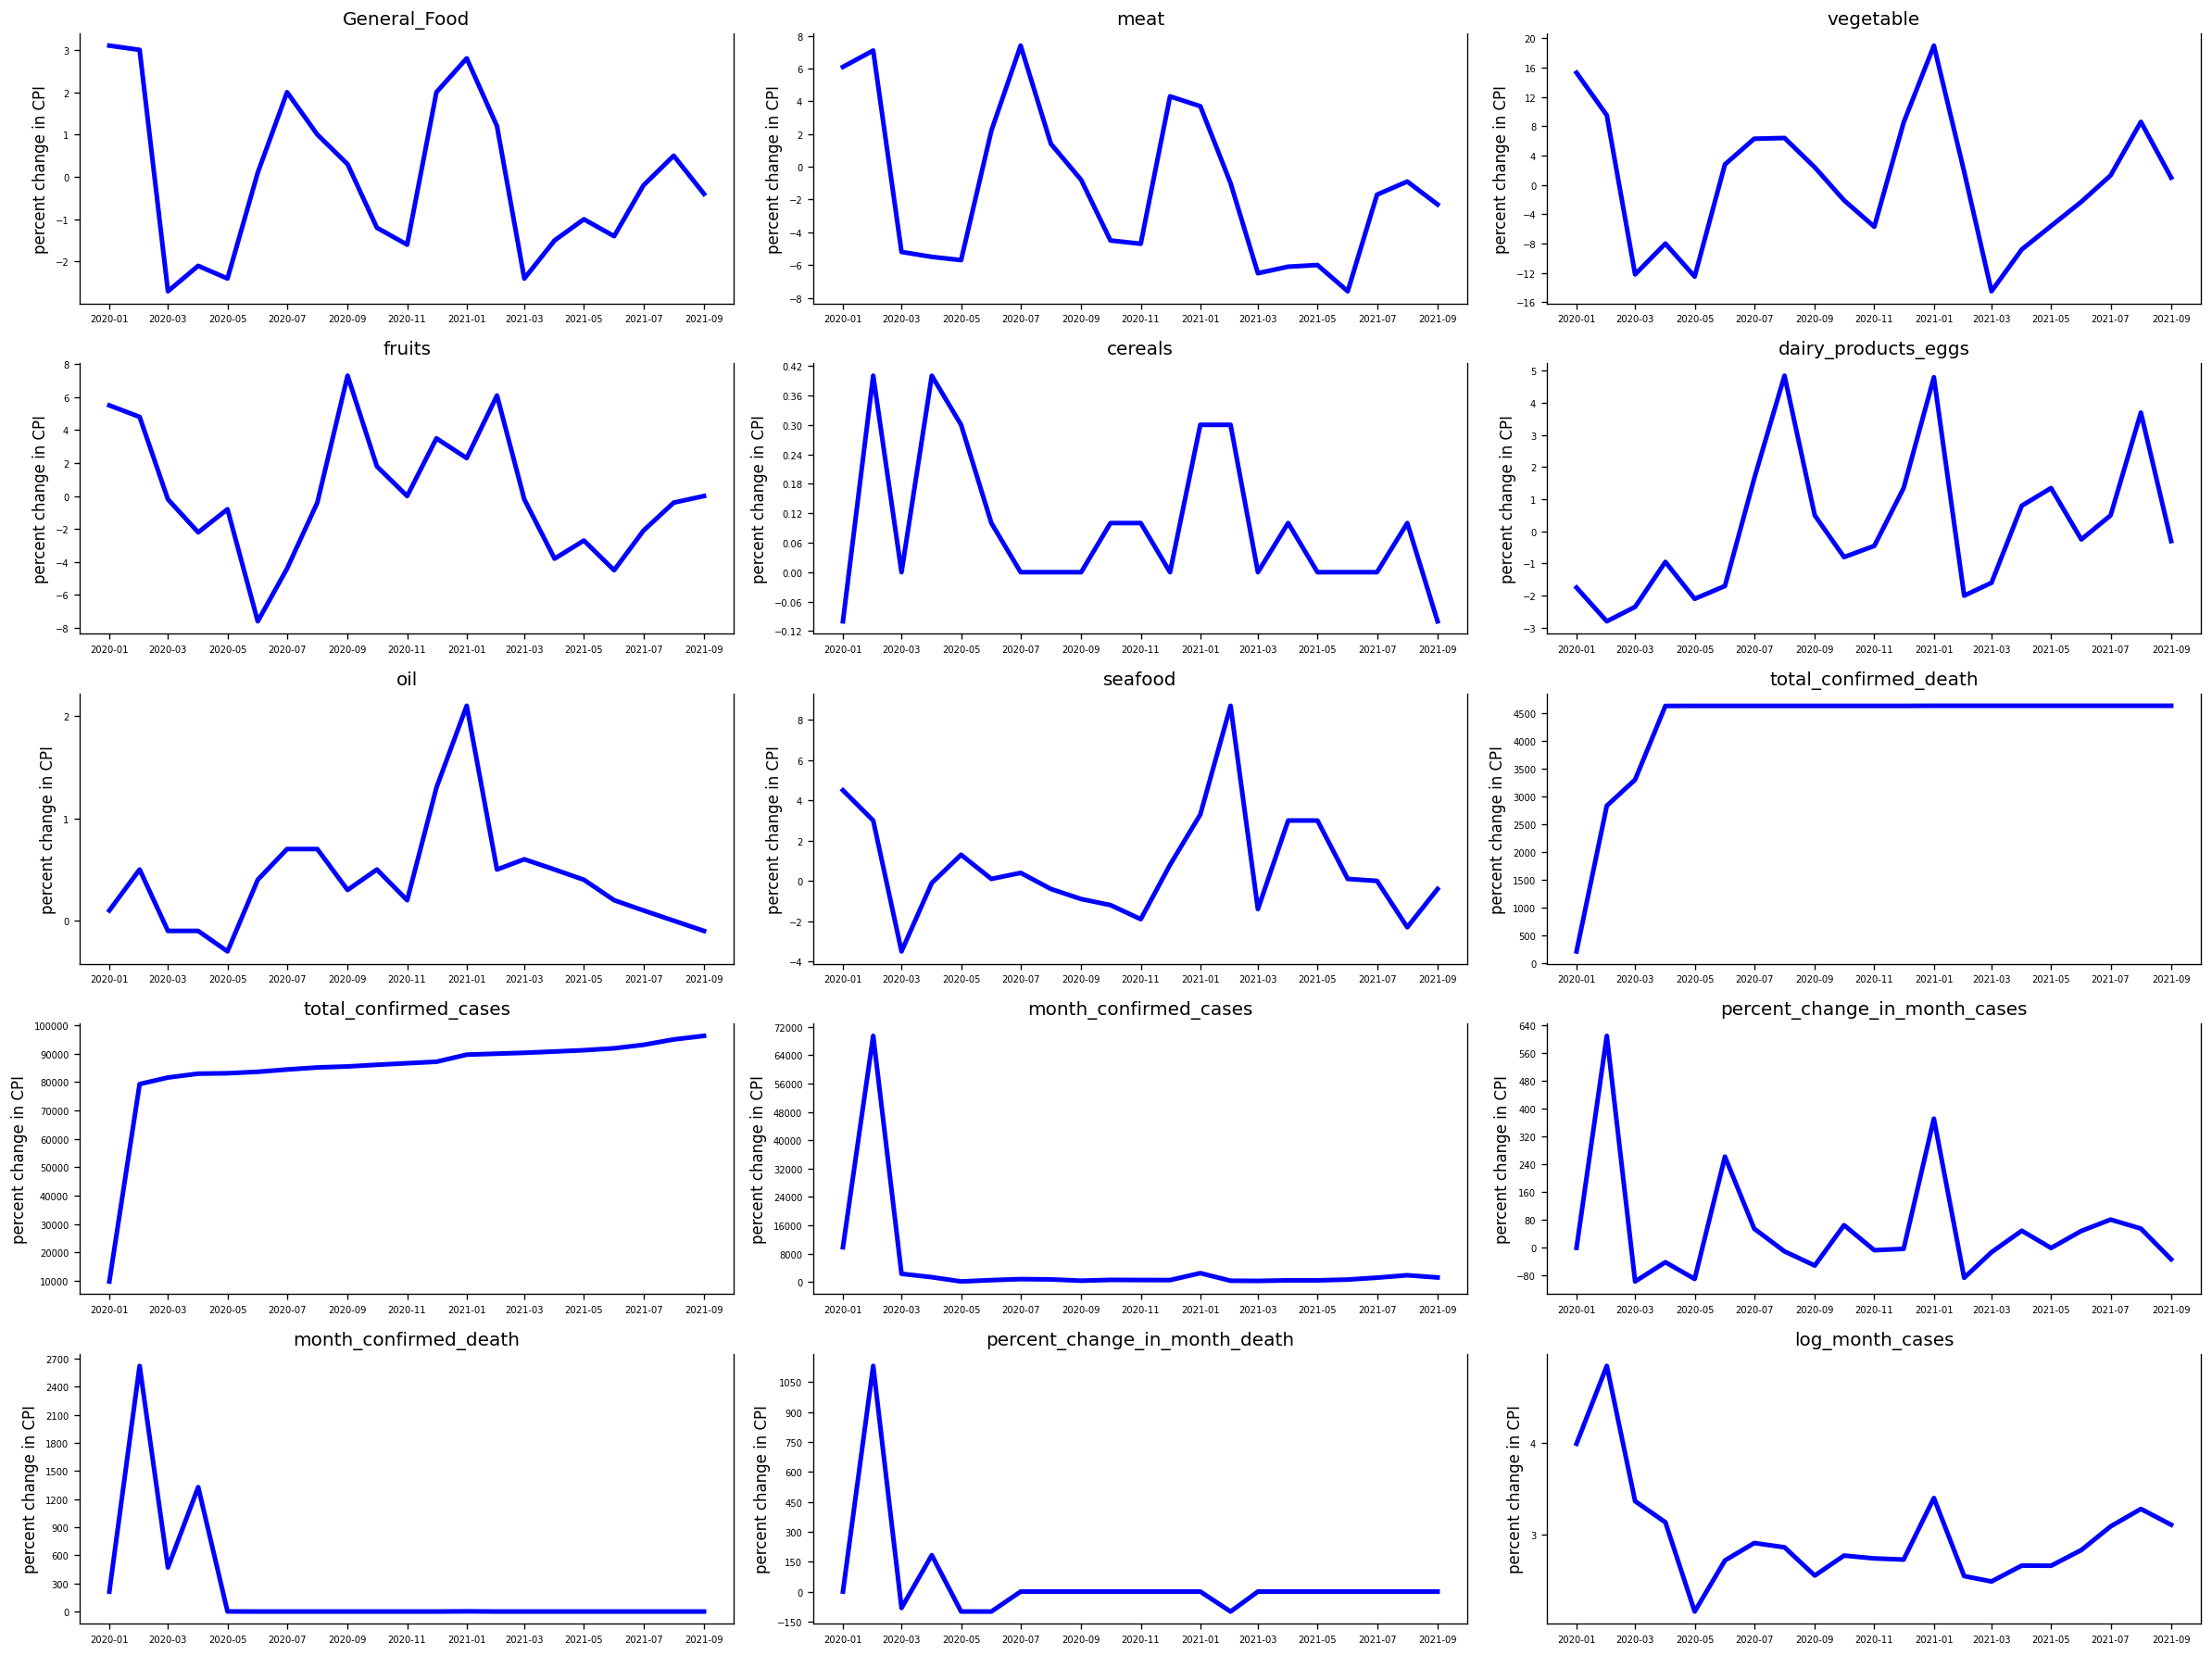

In [53]:
## Plot
import matplotlib.ticker as ticker
from matplotlib.ticker import MaxNLocator
fig, axes = plt.subplots(nrows=5, ncols=3, dpi=120, figsize=(20,15))
for i, ax in enumerate(axes.flatten()):
 data = China_CPI_Covid_selected[China_CPI_Covid_selected.columns[i]]
 ax.plot(data, color='blue', linewidth=3)
 ax.set_title(China_CPI_Covid_selected.columns[i])
 #ax.xaxis.set_ticks_position('none')
 #ax.yaxis.set_ticks_position('none')
 ax.set_ylabel("percent change in CPI")
 ax.yaxis.set_major_locator(MaxNLocator(integer=True))
 ax.spines["top"].set_alpha(0)
 ax.tick_params(labelsize=6)
plt.tight_layout();

The correlation of the monthly CPI percent change among all kinds of food

In [54]:
China_select_covid_food.meat=pd.to_numeric(China_select_covid_food.meat)
China_select_covid_food.dairy_products_eggs=pd.to_numeric(China_select_covid_food.dairy_products_eggs)

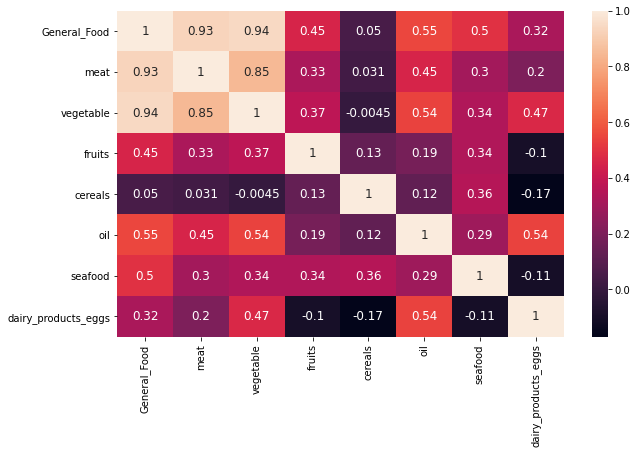

In [55]:
import seaborn as sns
corr = China_select_covid_food.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True, annot_kws={'size':12})
heat_map=plt.gcf()
heat_map.set_size_inches(10,6)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [56]:
from statsmodels.tsa.stattools import adfuller, kpss, acf, pacf, grangercausalitytests
from statsmodels.nonparametric.smoothers_lowess import lowess
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
%matplotlib inline

To extract maximum information from our data, it is important to have a normal or Gaussian distribution of the data. To check for that, we have done a normality test based on the Null and Alternate Hypothesis intuition.

In [57]:
from scipy.stats import normaltest
stat, p = normaltest(China_CPI_Covid_selected.General_Food)
print("Statistics = %.3f, p=%.3f" % (stat,p))
alpha = 0.05
if p > alpha:
    print('Data looks Gaussian (fail to reject null hypothesis)')
else:
    print('Data looks non-Gaussian (reject null hypothesis')


Statistics = 2.833, p=0.243
Data looks Gaussian (fail to reject null hypothesis)


Transformation:

Applying first differencing on training set to make all the series stationary. However, this is an iterative process where we after first differencing, the series may still be non-stationary. We shall have to apply second difference or log transformation to standardize the series in such cases.


In [58]:
transformed_China_CPI_Covid_selected=China_CPI_Covid_selected.diff().dropna()
from scipy import signal
transformed_China_CPI_Covid_selected['dairy_products_eggs']=signal.detrend(transformed_China_CPI_Covid_selected['dairy_products_eggs'])

ADF (Augmented Dickey-Fuller) Test Time Series Stationary

The Dickey Fuller test is one of the most popular statistical tests. It can be used to determine the presence of unit root in the series, and hence help us understand if the series is stationary or not. The null and alternate hypothesis of this test are:

Null Hypothesis: The series has a unit root (value of a =1)

Alternate Hypothesis: The series has no unit root.

If we fail to reject the null hypothesis, we can say that the series is non-stationary. This means that the series can be linear or difference stationary (we will understand more about difference stationary in the next section).

The ADF tests gives the following results – test statistic, p value and the critical value at 1%, 5% , and 10% confidence intervals. The results of our test for this particular series are:

In [59]:
#define function for ADF test
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    statistic, p_value, n_lags, critical_values = kpss(timeseries)
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

#apply adf test on the series
for column in transformed_China_CPI_Covid_selected:
    print(column)
    adf_test(transformed_China_CPI_Covid_selected[column])
    print()

General_Food
Results of Dickey-Fuller Test
Test Statistic                 -4.457533
p-value                         0.000234
#Lags Used                      1.000000
Number of Observations Used    18.000000
Critical Value (1%)            -3.859073
Critical Value (5%)            -3.042046
Critical Value (10%)           -2.660906
dtype: float64

meat
Results of Dickey-Fuller Test
Test Statistic                 -4.311618
p-value                         0.000424
#Lags Used                      8.000000
Number of Observations Used    11.000000
Critical Value (1%)            -4.223238
Critical Value (5%)            -3.189369
Critical Value (10%)           -2.729839
dtype: float64

vegetable
Results of Dickey-Fuller Test
Test Statistic                -8.066694e+00
p-value                        1.589258e-12
#Lags Used                     8.000000e+00
Number of Observations Used    1.100000e+01
Critical Value (1%)           -4.223238e+00
Critical Value (5%)           -3.189369e+00
Critical Val

/Users/yufeizhao/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1875: FutureWarning:

The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"

/Users/yufeizhao/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


/Users/yufeizhao/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1875: FutureWarning:

The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next releas

Test for stationarity: If the test statistic is less than the critical value, we can reject the null hypothesis (aka the series is stationary). When the test statistic is greater than the critical value, we fail to reject the null hypothesis (which means the series is not stationary).

In our case, the test statistic > critical value for 4 variables, which implies that the series is not stationary. The 4 variables are: fruits, dairy_products_eggs, percent_change_in_month_cases, percent_change_in_month_death

For other variables, the series is stationary.

We apply 

KPSS (Kwiatkowski-Phillips-Schmidt-Shin) Test

KPSS is another test for checking the stationarity of a time series (slightly less popular than the Dickey Fuller test). The null and alternate hypothesis for the KPSS test are opposite that of the ADF test, which often creates confusion.

Null Hypothesis: The process is trend stationary.

Alternate Hypothesis: The series has a unit root (series is not stationary).

In [60]:
#define function for kpss test
from statsmodels.tsa.stattools import kpss
#define KPSS
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    statistic, p_value, n_lags, critical_values = kpss(timeseries)
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')
    print (kpss_output)

#apply kpss test on the series
for column in transformed_China_CPI_Covid_selected:
    print(column)
    kpss_test(transformed_China_CPI_Covid_selected[column])
    print()

General_Food
Results of KPSS Test:
Result: The series is stationary
Test Statistic           0.265442
p-value                  0.100000
Lags Used                9.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64

meat
Results of KPSS Test:
Result: The series is stationary
Test Statistic           0.27561
p-value                  0.10000
Lags Used                9.00000
Critical Value (10%)     0.34700
Critical Value (5%)      0.46300
Critical Value (2.5%)    0.57400
Critical Value (1%)      0.73900
dtype: float64

vegetable
Results of KPSS Test:
Result: The series is stationary
Test Statistic           0.28359
p-value                  0.10000
Lags Used                9.00000
Critical Value (10%)     0.34700
Critical Value (5%)      0.46300
Critical Value (2.5%)    0.57400
Critical Value (1%)      0.73900
dtype: float64

fruits
Results of KPSS Test:
Result: The series is stationa

/Users/yufeizhao/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


/Users/yufeizhao/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


/Users/yufeizhao/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


/Users/yufeizhao/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The act

Test for stationarity: If the test statistic is greater than the critical value, we reject the null hypothesis (series is not stationary). If the test statistic is less than the critical value, if fail to reject the null hypothesis (series is stationary).


Case 1: Both tests conclude that the series is not stationary - The series is not stationary
Case 2: Both tests conclude that the series is stationary - The series is stationary
Case 3: KPSS indicates stationarity and ADF indicates non-stationarity - The series is trend stationary. Trend needs to be removed to make series strict stationary. The detrended series is checked for stationarity.
Case 4: KPSS indicates non-stationarity and ADF indicates stationarity - The series is difference stationary. Differencing is to be used to make series stationary. The differenced series is checked for stationarity.

If one of the test (ADF test) states it is not stationary, we need to detrend the series. We can do that by differencing. Mathematically, differencing can be written as: yt‘ = yt – y(t-1), where yt is the value at a time t. 

As all the time series are stationary, we perform granger causality test

Granger Causality Test

In [61]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=3

test = 'ssr-chi2test'

def grangers_causality_matrix(data, variables, test = 'ssr_chi2test', verbose=False):

    dataset = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)

    for c in dataset.columns:
        for r in dataset.index:
            test_result = grangercausalitytests(data[[r,c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')

            min_p_value = np.min(p_values)
            dataset.loc[r,c] = min_p_value

    dataset.columns = [var + '_x' for var in variables]

    dataset.index = [var + '_y' for var in variables]

    return dataset

grangers_causality_matrix(transformed_China_CPI_Covid_selected, variables = transformed_China_CPI_Covid_selected.columns) 

,General_Food_x,meat_x,vegetable_x,fruits_x,cereals_x,dairy_products_eggs_x,oil_x,seafood_x,total_confirmed_death_x,total_confirmed_cases_x,month_confirmed_cases_x,percent_change_in_month_cases_x,month_confirmed_death_x,percent_change_in_month_death_x,log_month_cases_x,log_month_death_x
General_Food_y,1.0000,0.0558,0.1191,0.0647,0.0009,0.0883,0.1845,0.0080,0.0024,0.0002,0.0027,0.2581,0.0001,0.0015,0.1444,0.0132
meat_y,0.4333,1.0000,0.2896,0.1025,0.0253,0.4936,0.6441,0.2709,0.0109,0.0020,0.0248,0.3597,0.0019,0.0089,0.0984,0.0044
vegetable_y,0.0130,0.0059,1.0000,0.2276,0.0000,0.3285,0.0630,0.1449,0.0086,0.0042,0.0239,0.0603,0.0011,0.0124,0.0139,0.0027
fruits_y,0.0098,0.0038,0.0001,1.0000,0.0065,0.0000,0.0124,0.3563,0.0735,0.0049,0.0005,0.0007,0.0962,0.0466,0.0000,0.0090
cereals_y,0.7943,0.8020,0.4371,0.2243,1.0000,0.1159,0.0005,0.2037,0.1908,0.0103,0.0105,0.2418,0.0703,0.0337,0.1074,0.0250
dairy_products_eggs_y,0.0021,0.0000,0.2165,0.0000,0.0008,1.0000,0.3959,0.3611,0.5366,0.0161,0.4348,0.3534,0.1519,0.7056,0.6790,0.0440
oil_y,0.0900,0.0129,0.7073,0.0519,0.0240,0.0021,1.0000,0.7671,0.2881,0.0005,0.0002,0.0150,0.2496,0.4311,0.0286,0.0573
seafood_y,0.2459,0.4032,0.0091,0.2699,0.1053,0.0003,0.0000,1.0000,0.1265,0.0001,0.0000,0.0015,0.1509,0.1593,0.0278,0.8714
total_confirmed_death_y,0.0003,0.0039,0.0075,0.2464,0.0001,0.7459,0.0297,0.0301,1.0000,0.0000,0.0000,0.0001,0.0000,0.0000,0.0010,0.0000
total_confirmed_cases_y,0.0096,0.0003,0.0387,0.3264,0.1127,0.4547,0.0684,0.5687,0.3406,1.0000,0.3820,0.6143,0.3656,0.3106,0.3018,0.9250


 If a given p-value is < significance level (0.05), then, the corresponding X series (column) causes the Y (row).

Japan Dataset Regression

In [62]:
Japan_CPI_Covid = pd.read_csv('//Users/yufeizhao/Desktop/440-Project/Japan_Dataset_1.csv')

Japan_CPI_Covid.head()

,Unnamed: 0,Unnamed: 1,general food,meat,vegetables,fruits,cereals,dairy products&eggs,oils,cakes&candies,seafood,Unnamed: 11,total confirmed covid deaths,total confirmed covid cases,confirmed covid cases,% change in confirmed cases,confirmed covid deaths,% change in confirmed deaths,log month cases,log month death
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018/12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN
2,2019/1,NaN,1.02,0.41,8.80,6.37,-0.1,0.00,-0.1,0.42,1.41,NaN,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0
3,2019/2,NaN,-0.51,-0.20,-5.09,0.00,0.0,-0.51,0.3,-0.31,-1.19,NaN,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0
4,2019/3,NaN,-0.31,0.20,-4.74,-1.83,0.0,0.31,-0.5,0.52,-0.10,NaN,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0


In [63]:
Japan_CPI_Covid.columns=['Date','Empty1','General_Food','meat','vegetable','fruits','cereals','dairy_products_eggs', 'oil', 'cakes_candies','seafood', 'Empty2','total_confirmed_death','total_confirmed_cases','month_confirmed_cases','percent_change_in_month_cases','month_confirmed_death','percent_change_in_month_death', 'log_month_cases', 'log_month_death']

#China_CPI_Covid.head()

Japan_CPI_Covid=Japan_CPI_Covid.drop(['Empty1', 'Empty2'], axis=1)
Japan_CPI_Covid=Japan_CPI_Covid.drop([0,1])

Japan_CPI_Covid.head()


,Date,General_Food,meat,vegetable,fruits,cereals,dairy_products_eggs,oil,cakes_candies,seafood,total_confirmed_death,total_confirmed_cases,month_confirmed_cases,percent_change_in_month_cases,month_confirmed_death,percent_change_in_month_death,log_month_cases,log_month_death
2,2019/1,1.02,0.41,8.80,6.37,-0.1,0.00,-0.1,0.42,1.41,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0
3,2019/2,-0.51,-0.20,-5.09,0.00,0.0,-0.51,0.3,-0.31,-1.19,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0
4,2019/3,-0.31,0.20,-4.74,-1.83,0.0,0.31,-0.5,0.52,-0.10,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0
5,2019/4,0.10,-0.10,3.20,-8.07,0.4,1.84,0.3,0.10,-0.10,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0
6,2019/5,0.10,-0.10,-2.68,5.29,0.1,0.60,0.0,0.21,0.00,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0


In [64]:
Japan_CPI_Covid['Date'] = pd.to_datetime(Japan_CPI_Covid['Date'])
Japan_CPI_Covid = Japan_CPI_Covid.set_index('Date')


In [65]:
Japan_CPI_Covid.head()

,General_Food,meat,vegetable,fruits,cereals,dairy_products_eggs,oil,cakes_candies,seafood,total_confirmed_death,total_confirmed_cases,month_confirmed_cases,percent_change_in_month_cases,month_confirmed_death,percent_change_in_month_death,log_month_cases,log_month_death
Date,,,,,,,,,,,,,,,,,
2019-01-01,1.02,0.41,8.80,6.37,-0.1,0.00,-0.1,0.42,1.41,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0
2019-02-01,-0.51,-0.20,-5.09,0.00,0.0,-0.51,0.3,-0.31,-1.19,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0
2019-03-01,-0.31,0.20,-4.74,-1.83,0.0,0.31,-0.5,0.52,-0.10,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0
2019-04-01,0.10,-0.10,3.20,-8.07,0.4,1.84,0.3,0.10,-0.10,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0
2019-05-01,0.10,-0.10,-2.68,5.29,0.1,0.60,0.0,0.21,0.00,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0


<AxesSubplot:xlabel='Date'>

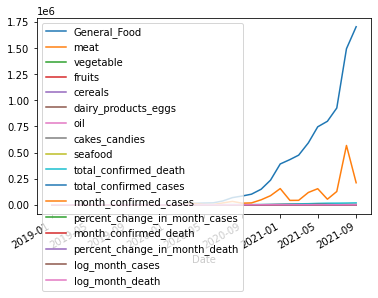

In [66]:
Japan_CPI_Covid.plot()

Text(0, 0.5, 'CPI')

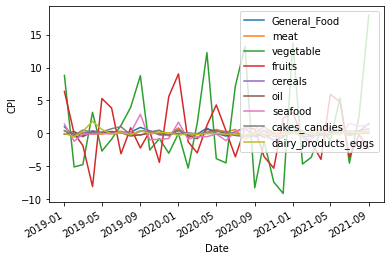

In [67]:
Japan_select_food = Japan_CPI_Covid[['General_Food','meat','vegetable','fruits','cereals','oil','seafood','cakes_candies','dairy_products_eggs']]

Japan_select_food.plot()
plt.ylabel("CPI")

In [68]:
print(Japan_select_food)

            General_Food  meat  vegetable  fruits  cereals   oil  seafood  \
Date                                                                        
2019-01-01          1.02  0.41       8.80    6.37     -0.1 -0.10     1.41   
2019-02-01         -0.51 -0.20      -5.09    0.00      0.0  0.30    -1.19   
2019-03-01         -0.31  0.20      -4.74   -1.83      0.0 -0.50    -0.10   
2019-04-01          0.10 -0.10       3.20   -8.07      0.4  0.30    -0.10   
2019-05-01          0.10 -0.10      -2.68    5.29      0.1  0.00     0.00   
2019-06-01          0.20  0.20      -0.88    3.85      0.2  0.30    -0.10   
2019-07-01          0.10  0.30       1.22   -3.09      0.2  0.10     0.30   
2019-08-01          0.20  0.10       3.95    0.85     -0.2 -0.40     0.10   
2019-09-01          0.91 -0.30       8.76   -2.21      0.3 -0.20     2.90   
2019-10-01          0.40  0.20      -2.52    0.32      0.4  0.00    -0.97   
2019-11-01         -0.20  0.40      -0.80   -4.40     -0.2  0.00    -0.88   

In [69]:
Japan_CPI_Covid.columns

Index(['General_Food', 'meat', 'vegetable', 'fruits', 'cereals',
       'dairy_products_eggs', 'oil', 'cakes_candies', 'seafood',
       'total_confirmed_death', 'total_confirmed_cases',
       'month_confirmed_cases', 'percent_change_in_month_cases',
       'month_confirmed_death', 'percent_change_in_month_death',
       'log_month_cases', 'log_month_death'],
      dtype='object')

<AxesSubplot:xlabel='Date'>

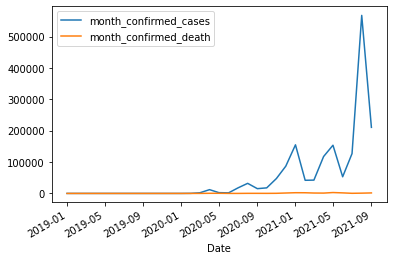

In [70]:
Japan_select_covid_month = Japan_CPI_Covid[['month_confirmed_cases', 'month_confirmed_death']]

Japan_select_covid_month.plot()

Text(0, 0.5, 'log numbers of monthyly cases and death')

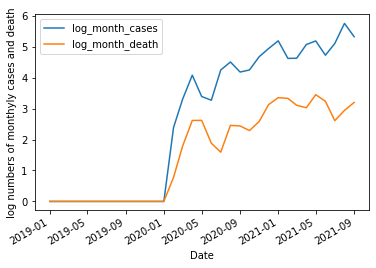

In [71]:
Japan_select_covid_month = Japan_CPI_Covid[['log_month_cases', 'log_month_death']]

Japan_select_covid_month.plot()

plt.ylabel("log numbers of monthyly cases and death")

In [72]:
Japan_select_covid_food = Japan_select_food.drop(Japan_select_food.index[range(12)])
Japan_select_covid_food = Japan_select_covid_food.drop(Japan_select_covid_food.index[[21,22,23]])
print(Japan_select_covid_food)

            General_Food  meat  vegetable  fruits  cereals   oil  seafood  \
Date                                                                        
2020-01-01          0.80  0.81       0.00    9.03      0.0  0.50     1.70   
2020-02-01         -0.60 -0.60      -5.27   -1.27      0.1 -0.30    -0.88   
2020-03-01         -0.10  0.00       1.53   -2.96     -0.1 -0.80    -0.50   
2020-04-01          0.80  0.00      12.26    1.22      0.0  0.60    -0.50   
2020-05-01          0.00  0.60      -3.83    4.32      0.0  0.40    -0.10   
2020-06-01         -0.40  0.20      -4.48    0.39     -0.1  0.00    -1.10   
2020-07-01          0.30  0.60       7.19   -3.55      0.1 -0.30     0.30   
2020-08-01          0.80 -0.89      13.23    0.80     -0.4 -0.40     0.61   
2020-09-01         -0.50 -0.10      -8.25    0.69     -0.4  0.10     1.20   
2020-10-01         -0.10  0.50      -1.22   -3.53      0.4 -0.60    -0.40   
2020-11-01         -1.00  0.00      -7.39   -5.28     -0.5  0.00    -1.10   

In [73]:
Japan_CPI_Covid_selected = Japan_CPI_Covid.drop(Japan_CPI_Covid.index[range(12)])
Japan_CPI_Covid_selected = Japan_CPI_Covid_selected.drop(Japan_CPI_Covid_selected.index[[21,22,23]])
print(Japan_CPI_Covid_selected)


            General_Food  meat  vegetable  fruits  cereals  \
Date                                                         
2020-01-01          0.80  0.81       0.00    9.03      0.0   
2020-02-01         -0.60 -0.60      -5.27   -1.27      0.1   
2020-03-01         -0.10  0.00       1.53   -2.96     -0.1   
2020-04-01          0.80  0.00      12.26    1.22      0.0   
2020-05-01          0.00  0.60      -3.83    4.32      0.0   
2020-06-01         -0.40  0.20      -4.48    0.39     -0.1   
2020-07-01          0.30  0.60       7.19   -3.55      0.1   
2020-08-01          0.80 -0.89      13.23    0.80     -0.4   
2020-09-01         -0.50 -0.10      -8.25    0.69     -0.4   
2020-10-01         -0.10  0.50      -1.22   -3.53      0.4   
2020-11-01         -1.00  0.00      -7.39   -5.28     -0.5   
2020-12-01         -0.60  0.10      -9.11    2.25     -0.2   
2021-01-01          1.21  0.40      13.74    3.15      0.1   
2021-02-01         -0.50 -0.20      -4.65   -0.61      0.0   
2021-03-

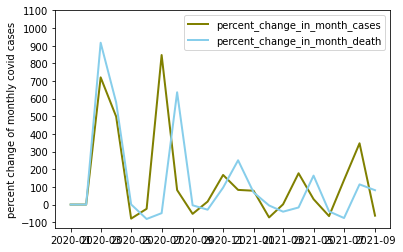

In [74]:
plt.plot('percent_change_in_month_cases', data=Japan_CPI_Covid_selected, color='olive', linewidth=2)
plt.plot('percent_change_in_month_death', data=Japan_CPI_Covid_selected, color='skyblue', linewidth=2)
plt.yticks(np.arange(-100, 1200, step=100))  # Set label locations.
plt.ylabel("percent change of monthly covid cases")
plt.legend()
plt.show()

In [75]:
Japan_CPI_Covid_selected.dtypes

General_Food                     float64
meat                             float64
vegetable                        float64
fruits                           float64
cereals                          float64
dairy_products_eggs              float64
oil                              float64
cakes_candies                    float64
seafood                          float64
total_confirmed_death            float64
total_confirmed_cases            float64
month_confirmed_cases            float64
percent_change_in_month_cases    float64
month_confirmed_death            float64
percent_change_in_month_death    float64
log_month_cases                  float64
log_month_death                  float64
dtype: object

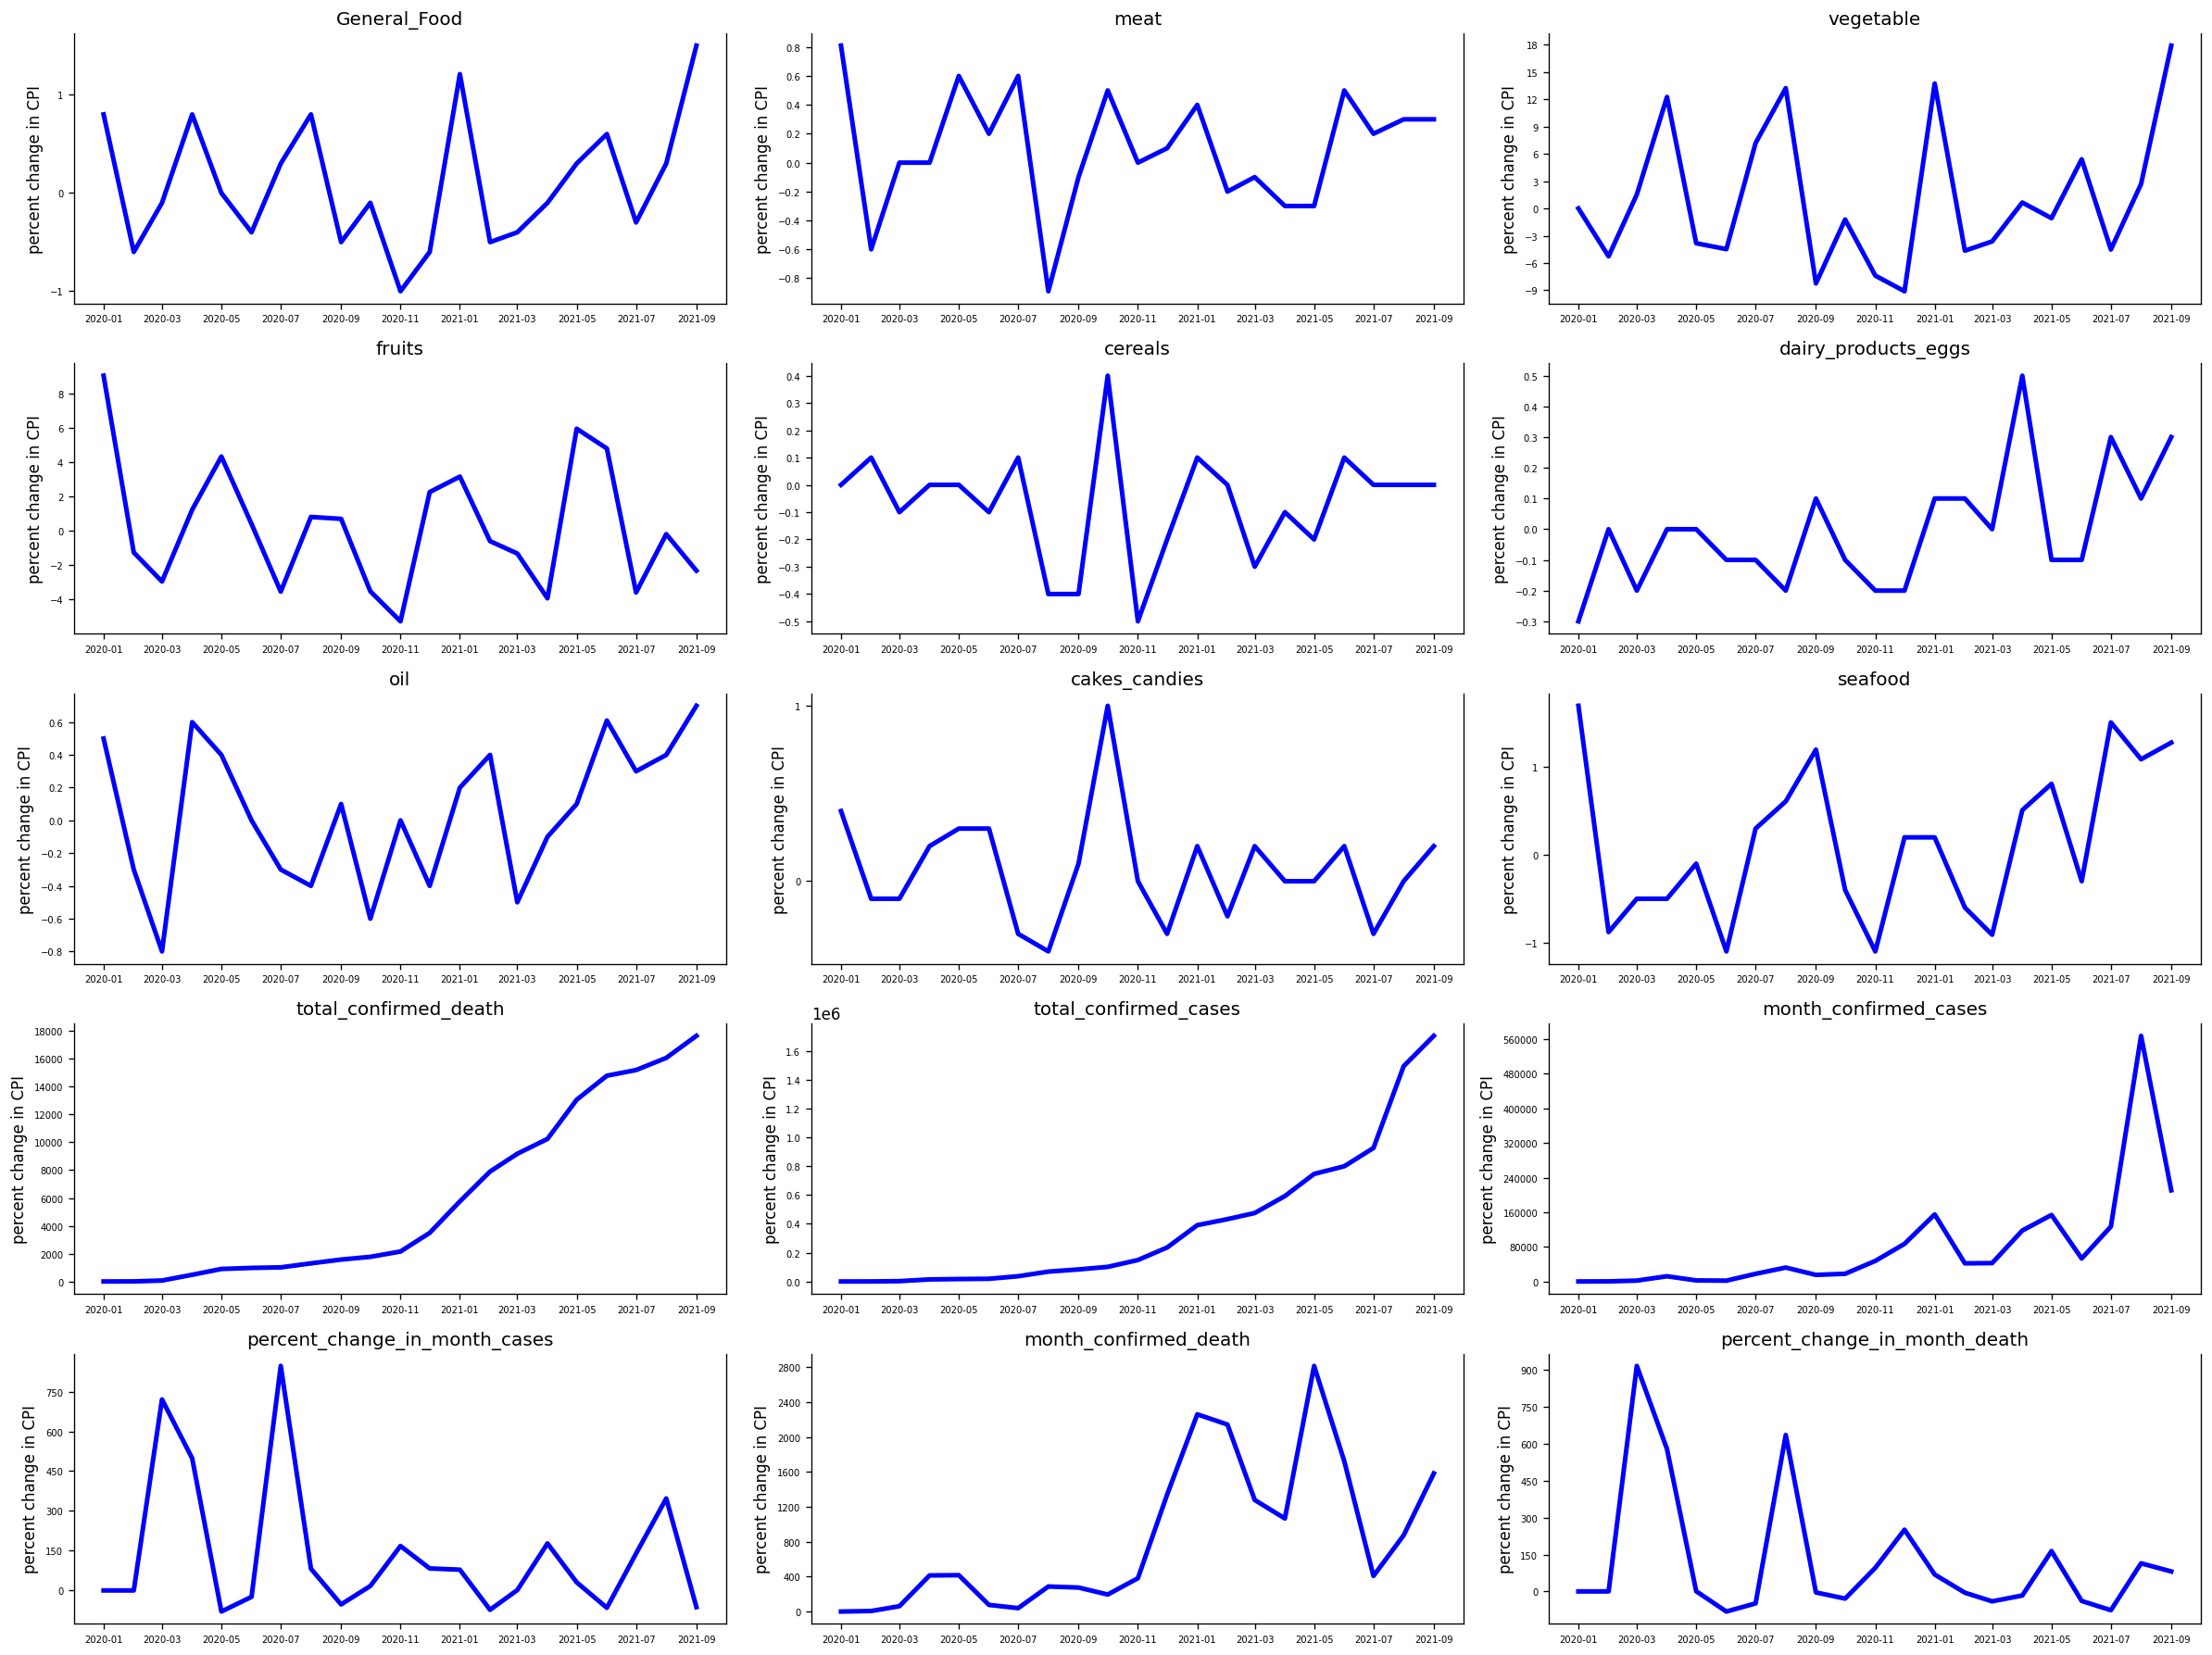

In [76]:
## Plot
import matplotlib.ticker as ticker
from matplotlib.ticker import MaxNLocator
fig, axes = plt.subplots(nrows=5, ncols=3, dpi=120, figsize=(20,15))
for i, ax in enumerate(axes.flatten()):
 data = Japan_CPI_Covid_selected[Japan_CPI_Covid_selected.columns[i]]
 ax.plot(data, color='blue', linewidth=3)
 ax.set_title(Japan_CPI_Covid_selected.columns[i])
 #ax.xaxis.set_ticks_position('none')
 #ax.yaxis.set_ticks_position('none')
 ax.set_ylabel("percent change in CPI")
 ax.yaxis.set_major_locator(MaxNLocator(integer=True))
 ax.spines["top"].set_alpha(0)
 ax.tick_params(labelsize=6)
plt.tight_layout();

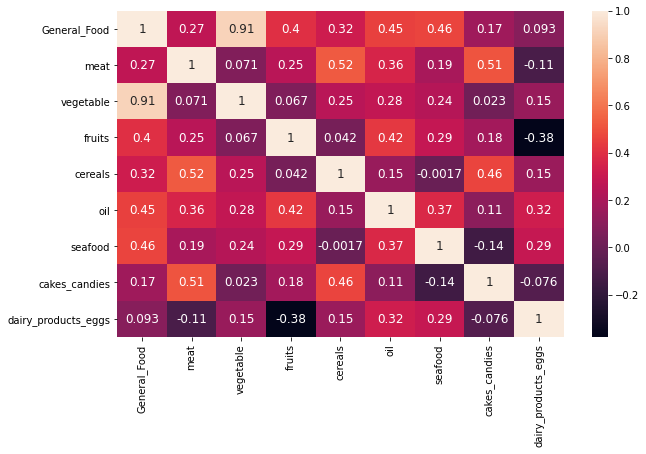

In [77]:
import seaborn as sns
corr = Japan_select_covid_food.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True, annot_kws={'size':12})
heat_map=plt.gcf()
heat_map.set_size_inches(10,6)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [78]:
from scipy.stats import normaltest
stat, p = normaltest(Japan_CPI_Covid_selected.General_Food)
print("Statistics = %.3f, p=%.3f" % (stat,p))
alpha = 0.05
if p > alpha:
    print('Data looks Gaussian (fail to reject null hypothesis)')
else:
    print('Data looks non-Gaussian (reject null hypothesis')


Statistics = 1.225, p=0.542
Data looks Gaussian (fail to reject null hypothesis)


In [79]:
for column in Japan_CPI_Covid_selected:
    print(column)
    adf_test(Japan_CPI_Covid_selected[column])
    print()

General_Food
Results of Dickey-Fuller Test
Test Statistic                 -4.319559
p-value                         0.000411
#Lags Used                      0.000000
Number of Observations Used    20.000000
Critical Value (1%)            -3.809209
Critical Value (5%)            -3.021645
Critical Value (10%)           -2.650713
dtype: float64

meat
Results of Dickey-Fuller Test
Test Statistic                 -3.001954
p-value                         0.034712
#Lags Used                      3.000000
Number of Observations Used    17.000000
Critical Value (1%)            -3.889266
Critical Value (5%)            -3.054358
Critical Value (10%)           -2.666984
dtype: float64

vegetable
Results of Dickey-Fuller Test
Test Statistic                 -4.337470
p-value                         0.000382
#Lags Used                      0.000000
Number of Observations Used    20.000000
Critical Value (1%)            -3.809209
Critical Value (5%)            -3.021645
Critical Value (10%)          

/Users/yufeizhao/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1875: FutureWarning:

The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"

/Users/yufeizhao/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


/Users/yufeizhao/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1875: FutureWarning:

The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next releas

In [80]:
for column in Japan_CPI_Covid_selected:
    print(column)
    kpss_test(Japan_CPI_Covid_selected[column])
    print()

General_Food
Results of KPSS Test:
Result: The series is stationary
Test Statistic           0.206925
p-value                  0.100000
Lags Used                9.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64

meat
Results of KPSS Test:
Result: The series is stationary
Test Statistic           0.184713
p-value                  0.100000
Lags Used                9.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64

vegetable
Results of KPSS Test:
Result: The series is stationary
Test Statistic           0.234741
p-value                  0.100000
Lags Used                9.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64

fruits
Results of KPSS Test:
Result: The seri

/Users/yufeizhao/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


/Users/yufeizhao/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


/Users/yufeizhao/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


/Users/yufeizhao/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The act

The original data is almost stationary under both tests. We try to transform the data and perform the tests again. The transformed data is less stationary than original data as shown below. So we use the original data. 

In [92]:
transformed_Japan_CPI_Covid_selected=Japan_CPI_Covid_selected.diff().dropna()
for column in transformed_Japan_CPI_Covid_selected:
    transformed_Japan_CPI_Covid_selected[column]=Japan_CPI_Covid_selected[column]-2*Japan_CPI_Covid_selected[column].shift(1)+Japan_CPI_Covid_selected[column].shift(2)
transformed_Japan_CPI_Covid_selected.drop(index=transformed_Japan_CPI_Covid_selected.index[0], axis=0, inplace=True)
#transformed_Japan_CPI_Covid_selected['General_Food']=signal.detrend(transformed_Japan_CPI_Covid_selected['General_Food'])
transformed_Japan_CPI_Covid_selected['meat']=signal.detrend(transformed_Japan_CPI_Covid_selected['meat'])

In [93]:
#apply adf test on the series
for column in transformed_Japan_CPI_Covid_selected:
    print(column)
    adf_test(transformed_Japan_CPI_Covid_selected[column])
    print()

General_Food
Results of Dickey-Fuller Test
Test Statistic                 -2.395172
p-value                         0.143104
#Lags Used                      7.000000
Number of Observations Used    11.000000
Critical Value (1%)            -4.223238
Critical Value (5%)            -3.189369
Critical Value (10%)           -2.729839
dtype: float64

meat
Results of Dickey-Fuller Test
Test Statistic                 -5.026928
p-value                         0.000020
#Lags Used                      1.000000
Number of Observations Used    17.000000
Critical Value (1%)            -3.889266
Critical Value (5%)            -3.054358
Critical Value (10%)           -2.666984
dtype: float64

vegetable
Results of Dickey-Fuller Test
Test Statistic                 -4.852882
p-value                         0.000043
#Lags Used                      3.000000
Number of Observations Used    15.000000
Critical Value (1%)            -3.964443
Critical Value (5%)            -3.084908
Critical Value (10%)          

/Users/yufeizhao/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1875: FutureWarning:

The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"

/Users/yufeizhao/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


/Users/yufeizhao/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1875: FutureWarning:

The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next releas

In [94]:
#apply kpss test on the series
for column in transformed_Japan_CPI_Covid_selected:
    print(column)
    kpss_test(transformed_Japan_CPI_Covid_selected[column])
    print()

General_Food
Results of KPSS Test:
Result: The series is stationary
Test Statistic           0.266781
p-value                  0.100000
Lags Used                8.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64

meat
Results of KPSS Test:
Result: The series is stationary
Test Statistic           0.207469
p-value                  0.100000
Lags Used                8.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64

vegetable
Results of KPSS Test:
Result: The series is stationary
Test Statistic           0.280968
p-value                  0.100000
Lags Used                8.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64

fruits
Results of KPSS Test:
Result: The seri

/Users/yufeizhao/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


/Users/yufeizhao/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


/Users/yufeizhao/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


/Users/yufeizhao/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The act

In [95]:
grangers_causality_matrix(Japan_CPI_Covid_selected, variables = Japan_CPI_Covid_selected.columns) 

,General_Food_x,meat_x,vegetable_x,fruits_x,cereals_x,dairy_products_eggs_x,oil_x,cakes_candies_x,seafood_x,total_confirmed_death_x,total_confirmed_cases_x,month_confirmed_cases_x,percent_change_in_month_cases_x,month_confirmed_death_x,percent_change_in_month_death_x,log_month_cases_x,log_month_death_x
General_Food_y,1.0000,0.0337,0.0026,0.0047,0.0029,0.4578,0.2332,0.0009,0.0180,0.0113,0.0198,0.0015,0.0032,0.0673,0.2597,0.0540,0.5398
meat_y,0.4138,1.0000,0.2162,0.1053,0.1220,0.8474,0.0523,0.3728,0.4832,0.4434,0.3778,0.4050,0.0773,0.6252,0.1135,0.2492,0.0946
vegetable_y,0.0004,0.0005,1.0000,0.0005,0.0011,0.5480,0.1760,0.0005,0.0757,0.1069,0.0605,0.0107,0.0002,0.2240,0.3455,0.0464,0.3796
fruits_y,0.0000,0.2118,0.0000,1.0000,0.1564,0.1195,0.1902,0.0046,0.0013,0.6372,0.4736,0.6827,0.0471,0.2771,0.0423,0.2355,0.2808
cereals_y,0.6801,0.1029,0.2951,0.0066,1.0000,0.7514,0.0313,0.5317,0.1301,0.5280,0.4768,0.5074,0.0865,0.5959,0.1700,0.3623,0.0202
dairy_products_eggs_y,0.1505,0.4879,0.3616,0.0405,0.3957,1.0000,0.4204,0.0008,0.7024,0.0004,0.0006,0.0000,0.5891,0.0064,0.7014,0.0846,0.0409
oil_y,0.0000,0.3872,0.0238,0.0086,0.6249,0.0756,1.0000,0.0304,0.1739,0.0069,0.0028,0.0048,0.1026,0.0849,0.0054,0.0000,0.0009
cakes_candies_y,0.0000,0.0176,0.0000,0.1568,0.0067,0.3962,0.0682,1.0000,0.1151,0.2049,0.5829,0.4318,0.0958,0.2088,0.0228,0.2312,0.1042
seafood_y,0.7181,0.3201,0.2974,0.1508,0.1260,0.0001,0.0078,0.0266,1.0000,0.0001,0.0038,0.0618,0.2841,0.0561,0.0122,0.0107,0.0664
total_confirmed_death_y,0.0000,0.3547,0.0008,0.0000,0.3161,0.0259,0.0209,0.3971,0.0539,1.0000,0.0214,0.0024,0.0695,0.0090,0.3550,0.0004,0.0136


In [96]:
grangers_causality_matrix(transformed_Japan_CPI_Covid_selected, variables = transformed_Japan_CPI_Covid_selected.columns) 

,General_Food_x,meat_x,vegetable_x,fruits_x,cereals_x,dairy_products_eggs_x,oil_x,cakes_candies_x,seafood_x,total_confirmed_death_x,total_confirmed_cases_x,month_confirmed_cases_x,percent_change_in_month_cases_x,month_confirmed_death_x,percent_change_in_month_death_x,log_month_cases_x,log_month_death_x
General_Food_y,1.0000,0.0137,0.0010,0.0025,0.0018,0.3554,0.0030,0.0000,0.0112,0.0038,0.0211,0.0382,0.0082,0.0052,0.0809,0.0047,0.1229
meat_y,0.3692,1.0000,0.0819,0.0225,0.0910,0.4437,0.3217,0.2006,0.1843,0.2390,0.5447,0.6888,0.0553,0.1682,0.3676,0.0000,0.0034
vegetable_y,0.0030,0.0511,1.0000,0.0331,0.0196,0.1799,0.0064,0.0000,0.0349,0.0334,0.2083,0.1314,0.0004,0.0413,0.2523,0.0001,0.1470
fruits_y,0.0000,0.2720,0.0000,1.0000,0.2029,0.0000,0.0016,0.0000,0.0005,0.0494,0.0000,0.0001,0.1232,0.0342,0.1100,0.0091,0.0629
cereals_y,0.1760,0.1009,0.2052,0.0037,1.0000,0.4843,0.0008,0.1380,0.0295,0.2262,0.1170,0.0654,0.0002,0.0296,0.0033,0.0008,0.0001
dairy_products_eggs_y,0.0000,0.4810,0.0000,0.3302,0.3376,1.0000,0.0621,0.0000,0.2752,0.6412,0.0000,0.0007,0.3967,0.0520,0.3007,0.2949,0.4378
oil_y,0.0000,0.1155,0.0000,0.0017,0.0148,0.1390,1.0000,0.0088,0.0000,0.0051,0.1254,0.0700,0.0038,0.0046,0.0000,0.0000,0.0000
cakes_candies_y,0.0000,0.0221,0.0000,0.0122,0.0750,0.0481,0.0090,1.0000,0.0068,0.3128,0.6037,0.5452,0.0280,0.1524,0.0005,0.0321,0.0028
seafood_y,0.1740,0.2080,0.0820,0.0374,0.1218,0.0000,0.0391,0.0003,1.0000,0.0150,0.3185,0.5627,0.0734,0.0010,0.0307,0.2109,0.0000
total_confirmed_death_y,0.0096,0.6280,0.1138,0.0042,0.6167,0.0001,0.2225,0.0417,0.0179,1.0000,0.0000,0.0000,0.5162,0.0002,0.4124,0.0560,0.0810


 If a given p-value is < significance level (0.05), then, the corresponding X series (column) causes the Y (row).

In [54]:
UK_CPI_Covid = pd.read_csv('//Users/yufeizhao/Desktop/440-Project/UK_Dataset_1.csv')

UK_CPI_Covid.head()

,Unnamed: 0,Unnamed: 1,general food,meat,vegetables,fruits,cereals&bakery,dairy products&eggs,oils,"coffee, tea, cocoa",seafood,Unnamed: 11,total confirmed covid deaths,total confirmed covid cases,confirmed covid cases,% change in confirmed cases,confirmed covid deaths,% change in confirmed deaths,log month cases,log month death
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018/12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019/1,NaN,0.0,0.3,0.5,1.0,-3.1,-1.1,2.5,0.7,0.6,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2019/2,NaN,0.4,-0.4,1.6,-1.5,2.6,1.6,-4.3,-2.1,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2019/3,NaN,-0.1,-0.1,0.9,-2.1,0.7,-0.9,-1.4,2.7,-1.6,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
UK_CPI_Covid.columns=['Date','Empty1','General_Food','meat','vegetable','fruits','cereals','dairy_products_eggs','oil', 'sweets', 'seafood','Empty2', 'total_confirmed_death','total_confirmed_cases','month_confirmed_cases','percent_change_in_month_cases','month_confirmed_death','percent_change_in_month_death', 'log_month_cases', 'log_month_death']

#China_CPI_Covid.head()

UK_CPI_Covid=UK_CPI_Covid.drop(['Empty1', 'Empty2'], axis=1)
UK_CPI_Covid=UK_CPI_Covid.drop([0,1])

UK_CPI_Covid.head()


,Date,General_Food,meat,vegetable,fruits,cereals,dairy_products_eggs,oil,sweets,seafood,total_confirmed_death,total_confirmed_cases,month_confirmed_cases,percent_change_in_month_cases,month_confirmed_death,percent_change_in_month_death,log_month_cases,log_month_death
2,2019/1,0.0,0.3,0.5,1.0,-3.1,-1.1,2.5,0.7,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2019/2,0.4,-0.4,1.6,-1.5,2.6,1.6,-4.3,-2.1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2019/3,-0.1,-0.1,0.9,-2.1,0.7,-0.9,-1.4,2.7,-1.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2019/4,-0.3,-0.3,-1.0,-0.5,-0.1,-0.6,4.5,-2.0,-0.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2019/5,0.1,0.3,-0.5,-1.3,0.0,1.0,-1.9,1.2,2.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
UK_CPI_Covid['Date'] = pd.to_datetime(UK_CPI_Covid['Date'])
UK_CPI_Covid = UK_CPI_Covid.set_index('Date')

In [57]:
UK_CPI_Covid.head()

,General_Food,meat,vegetable,fruits,cereals,dairy_products_eggs,oil,sweets,seafood,total_confirmed_death,total_confirmed_cases,month_confirmed_cases,percent_change_in_month_cases,month_confirmed_death,percent_change_in_month_death,log_month_cases,log_month_death
Date,,,,,,,,,,,,,,,,,
2019-01-01,0.0,0.3,0.5,1.0,-3.1,-1.1,2.5,0.7,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-02-01,0.4,-0.4,1.6,-1.5,2.6,1.6,-4.3,-2.1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-03-01,-0.1,-0.1,0.9,-2.1,0.7,-0.9,-1.4,2.7,-1.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-04-01,-0.3,-0.3,-1.0,-0.5,-0.1,-0.6,4.5,-2.0,-0.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-05-01,0.1,0.3,-0.5,-1.3,0.0,1.0,-1.9,1.2,2.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:xlabel='Date'>

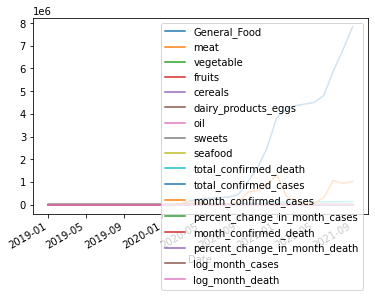

In [58]:
UK_CPI_Covid.plot()

Text(0, 0.5, 'CPI')

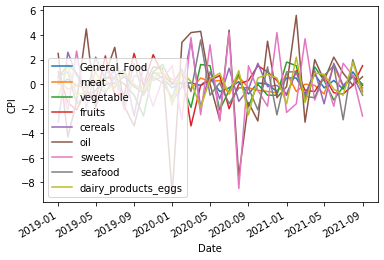

In [106]:
UK_select_food = UK_CPI_Covid[['General_Food','meat','vegetable','fruits','cereals','oil','sweets','seafood', 'dairy_products_eggs']]

UK_select_food.plot()
plt.ylabel("CPI")

In [60]:
print(UK_select_food)

            General_Food  meat  vegetable  fruits  cereals  oil  sweets  \
Date                                                                      
2019-01-01           0.0   0.3        0.5     1.0     -3.1  2.5     0.7   
2019-02-01           0.4  -0.4        1.6    -1.5      2.6 -4.3    -2.1   
2019-03-01          -0.1  -0.1        0.9    -2.1      0.7 -1.4     2.7   
2019-04-01          -0.3  -0.3       -1.0    -0.5     -0.1  4.5    -2.0   
2019-05-01           0.1   0.3       -0.5    -1.3      0.0 -1.9     1.2   
2019-06-01           0.0   0.3        0.5     2.3     -0.7  0.8     1.1   
2019-07-01           0.1  -0.3        0.5    -0.9      0.6  3.0     0.5   
2019-08-01           0.6   0.9        0.0    -0.8      1.2 -1.8    -2.1   
2019-09-01          -0.2  -0.1       -0.9     2.5     -2.6 -3.4     0.7   
2019-10-01          -0.7  -0.7       -2.6    -0.1      1.5 -0.3     0.5   
2019-11-01           1.0   0.9        1.0     2.4      0.3  1.4    -1.8   
2019-12-01           0.5 

In [61]:
UK_select_covid_food = UK_select_food.drop(UK_select_food.index[range(12)])
UK_select_covid_food = UK_select_covid_food.drop(UK_select_covid_food.index[[21,22]])
print(UK_select_covid_food)

            General_Food  meat  vegetable  fruits  cereals  oil  sweets  \
Date                                                                      
2020-01-01          -0.3   0.4        0.0     0.0     -1.4 -8.9     1.5   
2020-02-01           0.1   0.1        0.1     1.2     -0.2  3.4    -2.9   
2020-03-01           0.1  -0.4       -1.9    -3.4      3.5  4.2     3.8   
2020-04-01          -0.1   0.5        1.6    -0.1     -1.9  4.3    -2.5   
2020-05-01           0.5   0.2        1.5     0.3      1.0  0.0     3.2   
2020-06-01          -0.6   0.3       -2.1     0.7     -1.2 -2.9    -3.0   
2020-07-01          -0.3  -0.8       -0.5    -2.0      1.3  4.4     4.2   
2020-08-01           0.2   0.6        0.8     0.0     -1.4 -7.5    -8.5   
2020-09-01          -0.8  -0.3       -1.8     0.3     -0.4 -1.5     1.5   
2020-10-01           0.1  -0.5        0.0     1.5      1.7 -3.0    -0.5   
2020-11-01           0.0  -0.6       -0.9     1.0     -0.2  3.5    -1.8   
2020-12-01          -0.6 

<AxesSubplot:xlabel='Date'>

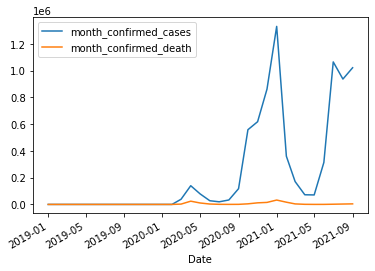

In [62]:
UK_select_covid_month = UK_CPI_Covid[['month_confirmed_cases', 'month_confirmed_death']]

UK_select_covid_month.plot()

Text(0, 0.5, 'log numbers of monthyly cases and death')

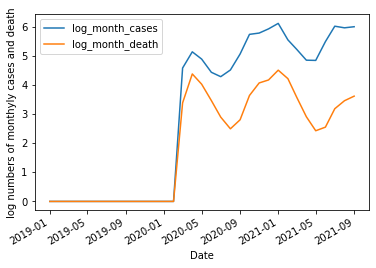

In [63]:
UK_select_covid_month = UK_CPI_Covid[['log_month_cases', 'log_month_death']]

UK_select_covid_month.plot()

plt.ylabel("log numbers of monthyly cases and death")

In [64]:
UK_CPI_Covid.columns

Index(['General_Food', 'meat', 'vegetable', 'fruits', 'cereals',
       'dairy_products_eggs', 'oil', 'sweets', 'seafood',
       'total_confirmed_death', 'total_confirmed_cases',
       'month_confirmed_cases', 'percent_change_in_month_cases',
       'month_confirmed_death', 'percent_change_in_month_death',
       'log_month_cases', 'log_month_death'],
      dtype='object')

In [65]:
UK_CPI_Covid_selected = UK_CPI_Covid.drop(UK_CPI_Covid.index[range(12)])
UK_CPI_Covid_selected = UK_CPI_Covid_selected.drop(UK_CPI_Covid_selected.index[[21,22]])
print(UK_CPI_Covid_selected)


            General_Food  meat  vegetable  fruits  cereals  \
Date                                                         
2020-01-01          -0.3   0.4        0.0     0.0     -1.4   
2020-02-01           0.1   0.1        0.1     1.2     -0.2   
2020-03-01           0.1  -0.4       -1.9    -3.4      3.5   
2020-04-01          -0.1   0.5        1.6    -0.1     -1.9   
2020-05-01           0.5   0.2        1.5     0.3      1.0   
2020-06-01          -0.6   0.3       -2.1     0.7     -1.2   
2020-07-01          -0.3  -0.8       -0.5    -2.0      1.3   
2020-08-01           0.2   0.6        0.8     0.0     -1.4   
2020-09-01          -0.8  -0.3       -1.8     0.3     -0.4   
2020-10-01           0.1  -0.5        0.0     1.5      1.7   
2020-11-01           0.0  -0.6       -0.9     1.0     -0.2   
2020-12-01          -0.6  -0.7       -0.9     0.3     -0.1   
2021-01-01           0.5   0.9        1.8    -0.9     -0.8   
2021-02-01           0.5  -0.6        1.5     1.1      1.0   
2021-03-

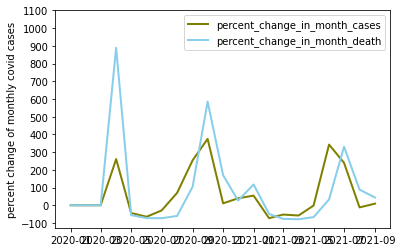

In [66]:
plt.plot('percent_change_in_month_cases', data=UK_CPI_Covid_selected, color='olive', linewidth=2)
plt.plot('percent_change_in_month_death', data=UK_CPI_Covid_selected, color='skyblue', linewidth=2)
plt.yticks(np.arange(-100, 1200, step=100))  # Set label locations.
plt.ylabel("percent change of monthly covid cases")
plt.legend()
plt.show()

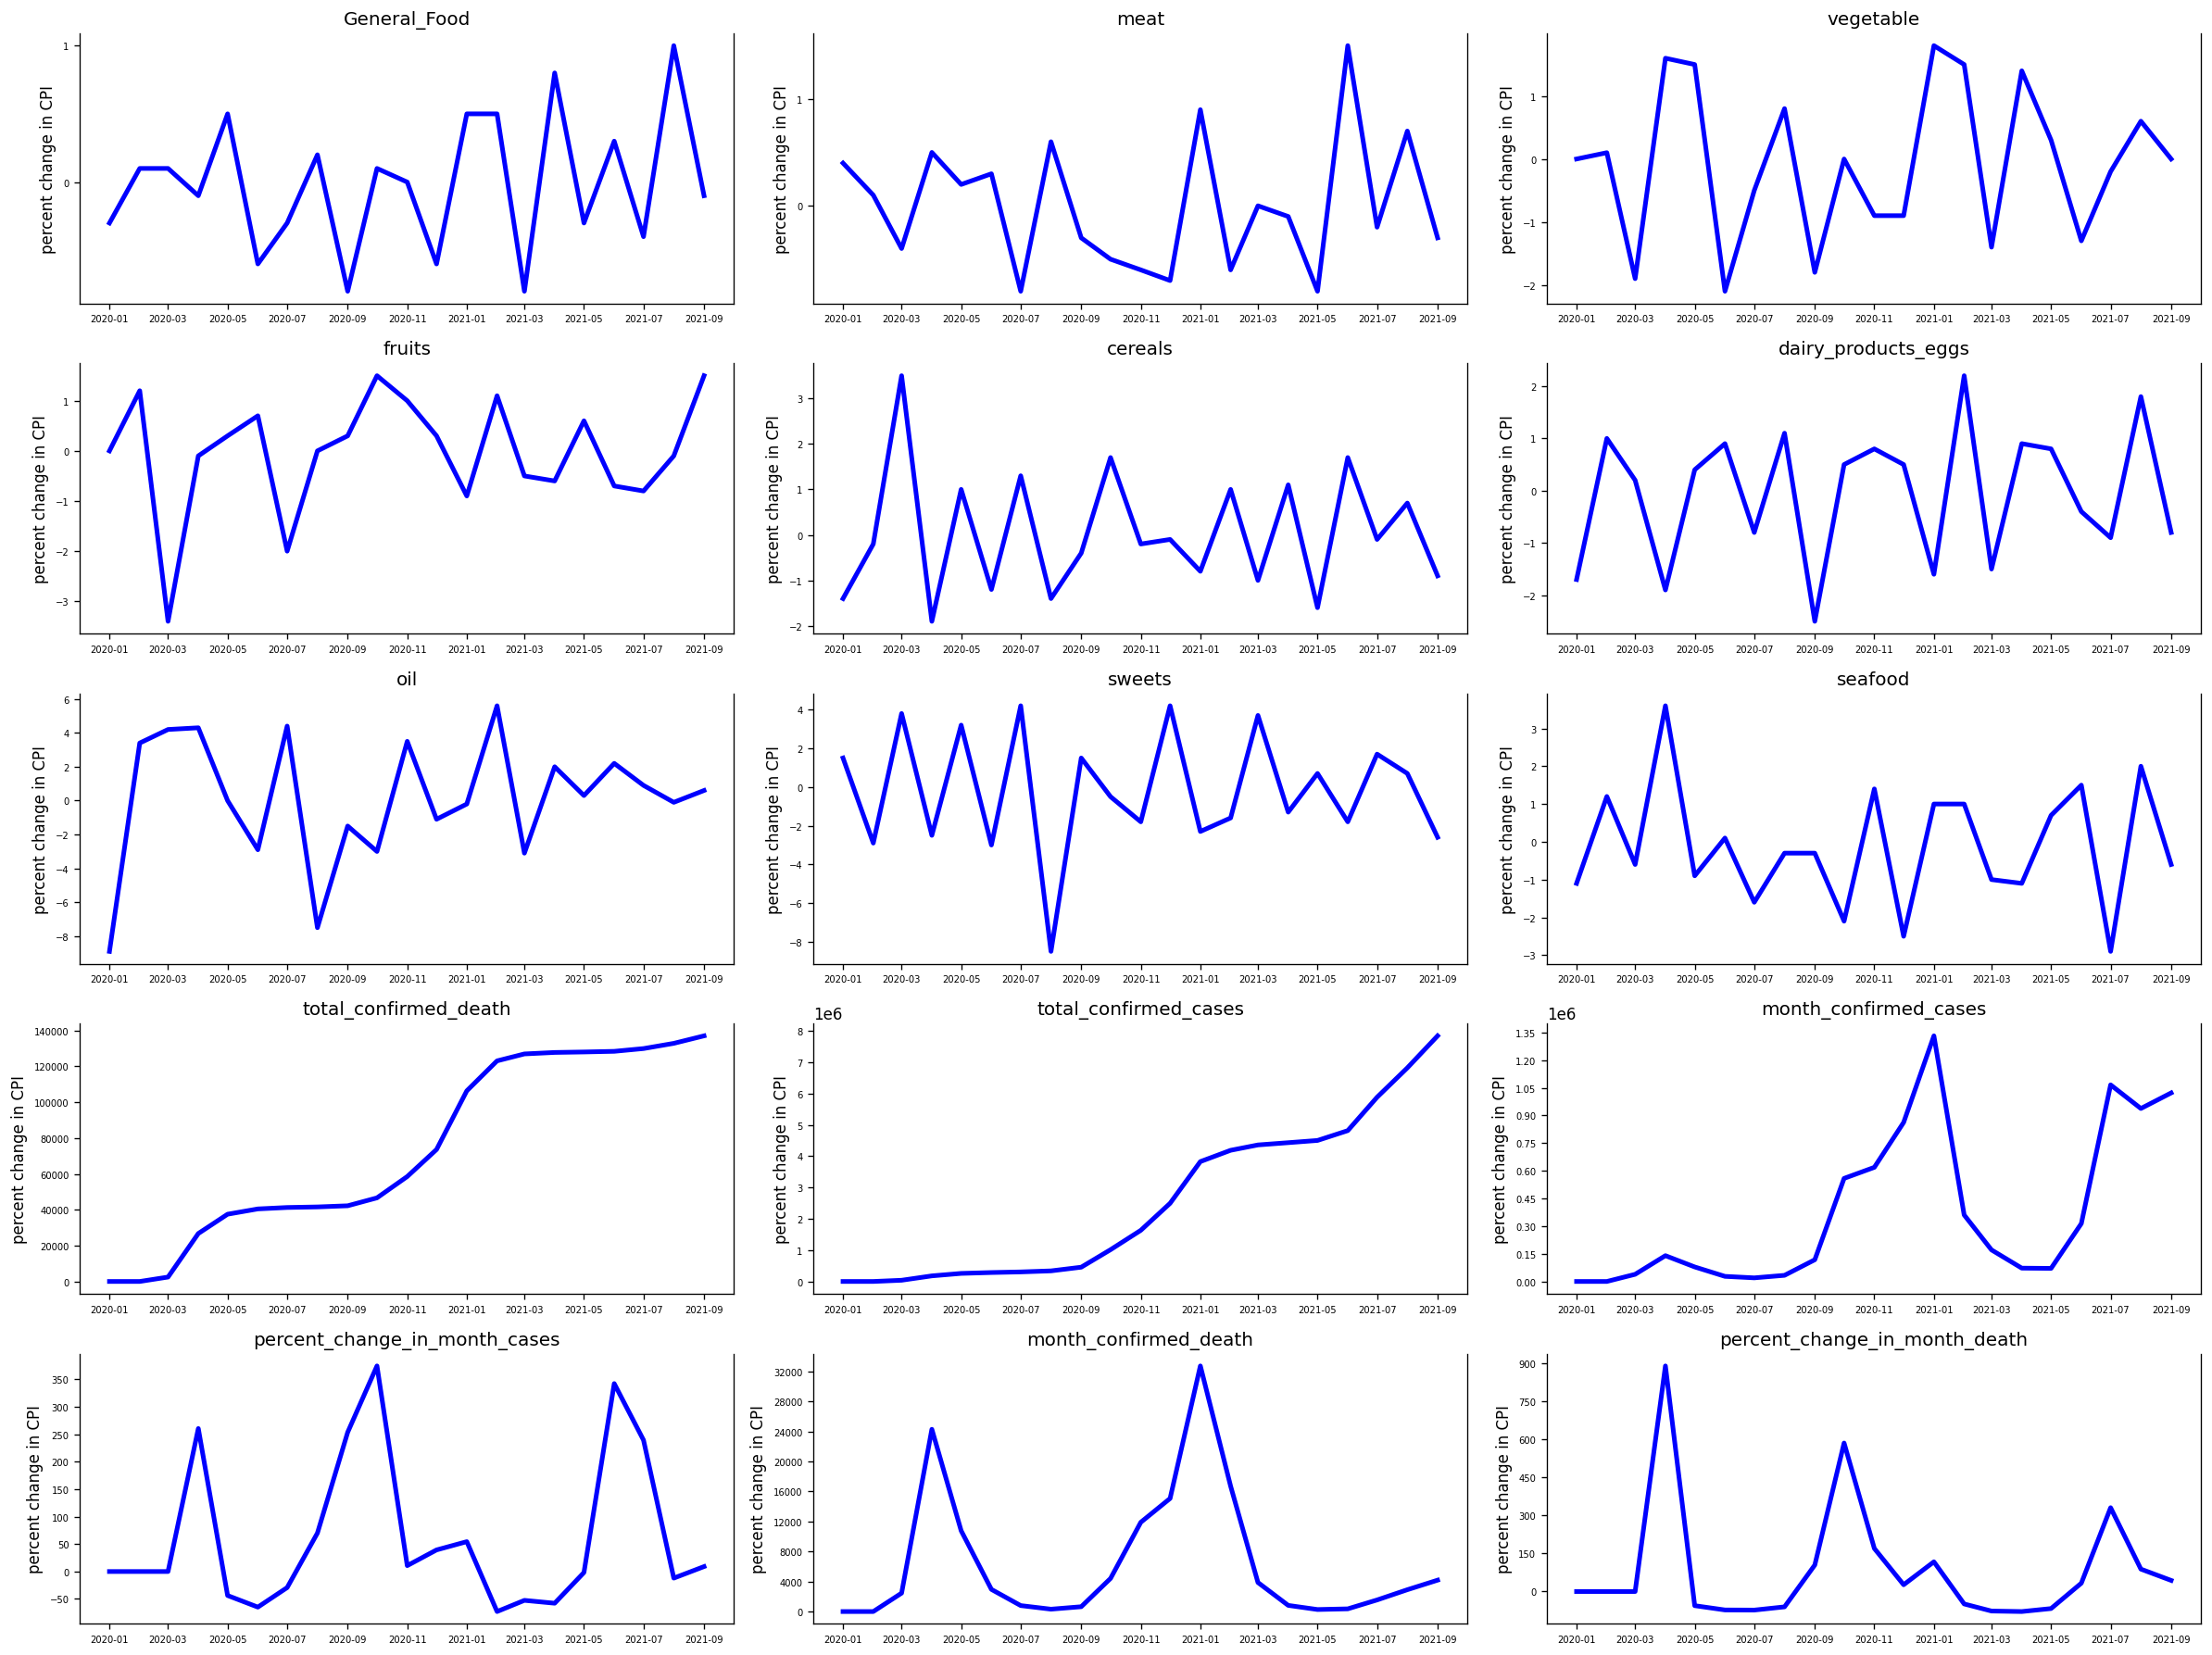

In [67]:
import matplotlib.ticker as ticker
from matplotlib.ticker import MaxNLocator
fig, axes = plt.subplots(nrows=5, ncols=3, dpi=120, figsize=(20,15))
for i, ax in enumerate(axes.flatten()):
 data = UK_CPI_Covid_selected[UK_CPI_Covid_selected.columns[i]]
 ax.plot(data, color='blue', linewidth=3)
 ax.set_title(UK_CPI_Covid_selected.columns[i])
 #ax.xaxis.set_ticks_position('none')
 #ax.yaxis.set_ticks_position('none')
 ax.yaxis.set_major_locator(MaxNLocator(integer=True))
 ax.set_ylabel("percent change in CPI")
 ax.spines["top"].set_alpha(0)
 ax.tick_params(labelsize=6)
plt.tight_layout();

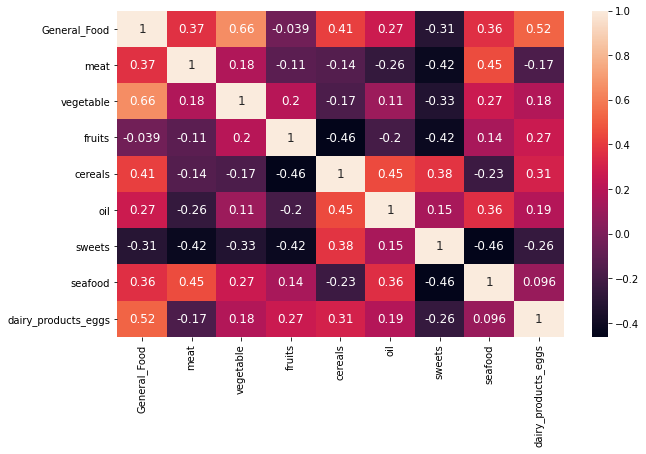

In [68]:
corr = UK_select_covid_food.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True, annot_kws={'size':12})
heat_map=plt.gcf()
heat_map.set_size_inches(10,6)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [69]:
from scipy.stats import normaltest
stat, p = normaltest(UK_CPI_Covid_selected.General_Food)
print("Statistics = %.3f, p=%.3f" % (stat,p))
alpha = 0.05
if p > alpha:
    print('Data looks Gaussian (fail to reject null hypothesis)')
else:
    print('Data looks non-Gaussian (reject null hypothesis')


Statistics = 0.403, p=0.818
Data looks Gaussian (fail to reject null hypothesis)


In [70]:
#apply adf test on the series
for column in UK_CPI_Covid_selected:
    print(column)
    adf_test(UK_CPI_Covid_selected[column])
    print()

General_Food
Results of Dickey-Fuller Test
Test Statistic                 -0.762663
p-value                         0.829844
#Lags Used                      3.000000
Number of Observations Used    17.000000
Critical Value (1%)            -3.889266
Critical Value (5%)            -3.054358
Critical Value (10%)           -2.666984
dtype: float64

meat
Results of Dickey-Fuller Test
Test Statistic                 -2.369308
p-value                         0.150587
#Lags Used                      8.000000
Number of Observations Used    12.000000
Critical Value (1%)            -4.137829
Critical Value (5%)            -3.154972
Critical Value (10%)           -2.714477
dtype: float64

vegetable
Results of Dickey-Fuller Test
Test Statistic                  1.096848
p-value                         0.995190
#Lags Used                      8.000000
Number of Observations Used    12.000000
Critical Value (1%)            -4.137829
Critical Value (5%)            -3.154972
Critical Value (10%)          

/Users/yufeizhao/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1875: FutureWarning:

The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"

/Users/yufeizhao/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


/Users/yufeizhao/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1875: FutureWarning:

The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next releas

In [71]:
#apply kpss test on the series
for column in UK_CPI_Covid_selected:
    print(column)
    kpss_test(UK_CPI_Covid_selected[column])
    print()

General_Food
Results of KPSS Test:
Result: The series is stationary
Test Statistic           0.284825
p-value                  0.100000
Lags Used                9.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64

meat
Results of KPSS Test:
Result: The series is stationary
Test Statistic           0.175358
p-value                  0.100000
Lags Used                9.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64

vegetable
Results of KPSS Test:
Result: The series is stationary
Test Statistic           0.23887
p-value                  0.10000
Lags Used                9.00000
Critical Value (10%)     0.34700
Critical Value (5%)      0.46300
Critical Value (2.5%)    0.57400
Critical Value (1%)      0.73900
dtype: float64

fruits
Results of KPSS Test:
Result: The series is s

/Users/yufeizhao/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


/Users/yufeizhao/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


/Users/yufeizhao/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


/Users/yufeizhao/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The act

In [72]:
transformed_UK_CPI_Covid_selected=UK_CPI_Covid_selected.diff().dropna()

from scipy import signal
for column in transformed_UK_CPI_Covid_selected:
    transformed_UK_CPI_Covid_selected[column]=signal.detrend(transformed_UK_CPI_Covid_selected[column].values)

transformed_UK_CPI_Covid_selected


,General_Food,meat,vegetable,fruits,cereals,dairy_products_eggs,oil,sweets,seafood,total_confirmed_death,total_confirmed_cases,month_confirmed_cases,percent_change_in_month_cases,month_confirmed_death,percent_change_in_month_death,log_month_cases,log_month_death
Date,,,,,,,,,,,,,,,,,
2020-02-01,0.332857,-0.248571,0.120000,1.358571,0.818571,2.294286,10.535714,-4.308571,2.055714,-8461.485714,17499.185714,-9.802429e+03,-17.948749,-1539.357143,-22.109048,-0.835676,-0.579060
2020-03-01,-0.061128,-0.450301,-1.982105,-4.466015,3.356090,-1.167744,-0.828571,6.803383,-2.021203,-5835.081955,13188.550376,2.466266e+04,-16.106877,1057.659398,-20.012201,3.809660,2.853237
2020-04-01,-0.255113,0.947970,3.515789,3.409398,-5.706391,-2.429774,-1.392857,-6.184662,4.001880,16174.321805,71203.915038,8.263876e+04,246.306938,20580.675940,870.973534,-0.166012,0.499873
2020-05-01,0.550902,-0.253759,-0.086316,0.484812,2.631128,2.008195,-5.657143,5.827293,-4.675038,2819.725564,-33109.720301,-8.404015e+04,-316.714533,-14643.307519,-960.368589,-0.916309,-0.806598
2020-06-01,-1.143083,0.144511,-3.588421,0.460226,-2.431353,0.246165,-4.121429,-6.060752,0.848045,-4831.870677,-127326.355639,-7.829306e+04,-31.724443,-8800.290977,-30.658630,-1.064563,-0.973710
2020-07-01,0.262932,-1.057218,1.609474,-2.664361,2.306165,-1.915865,6.214286,7.351203,-1.828872,-6819.466917,-178551.990977,-3.965197e+04,26.857066,-2996.274436,-12.095758,-0.704369,-0.939346
2020-08-01,0.468947,1.441053,1.307368,2.011053,-2.856316,1.722105,-12.850000,-12.536842,1.194211,-7130.063158,-207964.626316,-2.218887e+04,92.415141,-1179.257895,3.163780,-0.267092,-0.729761
2020-09-01,-1.025038,-0.860677,-2.594737,0.286466,0.881203,-3.739925,5.185714,10.175113,-0.082707,-6631.659398,-166615.261654,4.422322e+04,178.652750,-230.241353,157.390682,0.107379,0.024764
2020-10-01,0.880977,-0.162406,1.803158,1.161880,2.018722,2.898045,-2.178571,-1.812932,-1.859624,-2694.255639,231441.103008,3.965803e+05,117.660476,3348.775188,475.314450,0.291367,0.591831


In [73]:
#apply adf test on the series
for column in transformed_UK_CPI_Covid_selected:
    print(column)
    adf_test(transformed_UK_CPI_Covid_selected[column])
    print()

General_Food
Results of Dickey-Fuller Test
Test Statistic                 -4.257984
p-value                         0.000525
#Lags Used                      2.000000
Number of Observations Used    17.000000
Critical Value (1%)            -3.889266
Critical Value (5%)            -3.054358
Critical Value (10%)           -2.666984
dtype: float64

meat
Results of Dickey-Fuller Test
Test Statistic                 -4.964082
p-value                         0.000026
#Lags Used                      3.000000
Number of Observations Used    16.000000
Critical Value (1%)            -3.924019
Critical Value (5%)            -3.068498
Critical Value (10%)           -2.673893
dtype: float64

vegetable
Results of Dickey-Fuller Test
Test Statistic                -5.973228e+00
p-value                        1.914190e-07
#Lags Used                     6.000000e+00
Number of Observations Used    1.300000e+01
Critical Value (1%)           -4.068854e+00
Critical Value (5%)           -3.127149e+00
Critical Val

/Users/yufeizhao/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1875: FutureWarning:

The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"

/Users/yufeizhao/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


/Users/yufeizhao/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1875: FutureWarning:

The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next releas

In [74]:
#apply kpss test on the series
for column in transformed_UK_CPI_Covid_selected:
    print(column)
    kpss_test(transformed_UK_CPI_Covid_selected[column])
    print()

General_Food
Results of KPSS Test:
Result: The series is stationary
Test Statistic           0.226855
p-value                  0.100000
Lags Used                9.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64

meat
Results of KPSS Test:
Result: The series is stationary
Test Statistic           0.258843
p-value                  0.100000
Lags Used                9.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64

vegetable
Results of KPSS Test:
Result: The series is stationary
Test Statistic           0.202948
p-value                  0.100000
Lags Used                9.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64

fruits
Results of KPSS Test:
Result: The seri

/Users/yufeizhao/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


/Users/yufeizhao/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


/Users/yufeizhao/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


/Users/yufeizhao/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The act

In [75]:
grangers_causality_matrix(transformed_UK_CPI_Covid_selected, variables = transformed_UK_CPI_Covid_selected.columns) 

,General_Food_x,meat_x,vegetable_x,fruits_x,cereals_x,dairy_products_eggs_x,oil_x,sweets_x,seafood_x,total_confirmed_death_x,total_confirmed_cases_x,month_confirmed_cases_x,percent_change_in_month_cases_x,month_confirmed_death_x,percent_change_in_month_death_x,log_month_cases_x,log_month_death_x
General_Food_y,1.0000,0.8091,0.0029,0.0346,0.1486,0.0039,0.1560,0.0393,0.4387,0.0147,0.0004,0.0001,0.1142,0.0059,0.0103,0.0077,0.0014
meat_y,0.1390,1.0000,0.7942,0.1705,0.4266,0.2396,0.0040,0.0870,0.0255,0.5665,0.6703,0.4886,0.4096,0.3139,0.9219,0.2930,0.5852
vegetable_y,0.0186,0.7462,1.0000,0.0005,0.0081,0.0000,0.0582,0.1235,0.4743,0.0003,0.0051,0.0189,0.0979,0.0008,0.0141,0.0186,0.0099
fruits_y,0.0000,0.5768,0.0000,1.0000,0.2646,0.0009,0.0481,0.4790,0.1198,0.1431,0.4201,0.1033,0.0688,0.0781,0.0021,0.0793,0.0841
cereals_y,0.0695,0.4698,0.1009,0.0268,1.0000,0.0001,0.1136,0.0986,0.3438,0.5155,0.4217,0.4764,0.2695,0.5560,0.4296,0.0084,0.0061
dairy_products_eggs_y,0.0886,0.5003,0.0093,0.0061,0.0271,1.0000,0.1885,0.0000,0.3864,0.2972,0.1905,0.0468,0.0012,0.3565,0.2162,0.1616,0.1349
oil_y,0.6921,0.1124,0.5102,0.5464,0.0021,0.6280,1.0000,0.0626,0.0000,0.1510,0.2479,0.1122,0.4709,0.0224,0.1641,0.0184,0.0007
sweets_y,0.0129,0.1811,0.0083,0.0628,0.2288,0.6762,0.2129,1.0000,0.0375,0.7337,0.4572,0.2118,0.0059,0.2471,0.0000,0.4951,0.2051
seafood_y,0.0675,0.3969,0.0404,0.0549,0.1251,0.4625,0.0022,0.4380,1.0000,0.2276,0.1610,0.0764,0.7431,0.0516,0.3242,0.0275,0.0200
total_confirmed_death_y,0.4614,0.3021,0.1844,0.0195,0.1615,0.0158,0.0249,0.0294,0.0342,1.0000,0.0114,0.1337,0.0557,0.1804,0.1000,0.0004,0.0004


 If a given p-value is < significance level (0.05), then, the corresponding X series (column) causes the Y (row).

US Dataset Regression

In [76]:
US_CPI_Covid = pd.read_csv('//Users/yufeizhao/Desktop/440-Project/US_Dataset_1.csv')

US_CPI_Covid.head()

,Unnamed: 0,Unnamed: 1,general food,meat,vegetables,fruits,cereals,dairy products&eggs,oils,cakes&candies,seafood,Unnamed: 11,total confirmed covid deaths,total confirmed covid cases,confirmed covid cases,% change in confirmed cases,confirmed covid deaths,% change in confirmed deaths,log month cases,log month death
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018/12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019/1,NaN,0.5,0.6,0.7,1.7,-0.1,0.2,1.5,-1.0,0.5,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2019/2,NaN,0.3,0.0,-0.1,-0.7,0.6,-0.2,0.1,0.7,-0.4,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2019/3,NaN,0.2,0.8,0.3,0.0,1.6,0.4,0.1,-0.6,-0.4,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [77]:
US_CPI_Covid.columns=['Date','Empty1','General_Food','meat','vegetable','fruits','cereals','dairy_products_eggs','oil','cakes_candies', 'seafood','Empty2','total_confirmed_death','total_confirmed_cases','month_confirmed_cases','percent_change_in_month_cases','month_confirmed_death','percent_change_in_month_death', 'log_month_cases', 'log_month_death']

#China_CPI_Covid.head()

US_CPI_Covid=US_CPI_Covid.drop(['Empty1', 'Empty2'], axis=1)
US_CPI_Covid=US_CPI_Covid.drop([0,1])

US_CPI_Covid.head()

,Date,General_Food,meat,vegetable,fruits,cereals,dairy_products_eggs,oil,cakes_candies,seafood,total_confirmed_death,total_confirmed_cases,month_confirmed_cases,percent_change_in_month_cases,month_confirmed_death,percent_change_in_month_death,log_month_cases,log_month_death
2,2019/1,0.5,0.6,0.7,1.7,-0.1,0.2,1.5,-1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2019/2,0.3,0.0,-0.1,-0.7,0.6,-0.2,0.1,0.7,-0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2019/3,0.2,0.8,0.3,0.0,1.6,0.4,0.1,-0.6,-0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2019/4,0.0,0.1,-1.4,0.3,-0.7,0.0,-1.9,0.1,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2019/5,0.2,1.0,-1.0,-0.5,-0.2,0.2,1.9,0.7,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [78]:
US_CPI_Covid['Date'] = pd.to_datetime(US_CPI_Covid['Date'])
US_CPI_Covid = US_CPI_Covid.set_index('Date')


In [79]:
US_CPI_Covid.head()

,General_Food,meat,vegetable,fruits,cereals,dairy_products_eggs,oil,cakes_candies,seafood,total_confirmed_death,total_confirmed_cases,month_confirmed_cases,percent_change_in_month_cases,month_confirmed_death,percent_change_in_month_death,log_month_cases,log_month_death
Date,,,,,,,,,,,,,,,,,
2019-01-01,0.5,0.6,0.7,1.7,-0.1,0.2,1.5,-1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-02-01,0.3,0.0,-0.1,-0.7,0.6,-0.2,0.1,0.7,-0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-03-01,0.2,0.8,0.3,0.0,1.6,0.4,0.1,-0.6,-0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-04-01,0.0,0.1,-1.4,0.3,-0.7,0.0,-1.9,0.1,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-05-01,0.2,1.0,-1.0,-0.5,-0.2,0.2,1.9,0.7,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:xlabel='Date'>

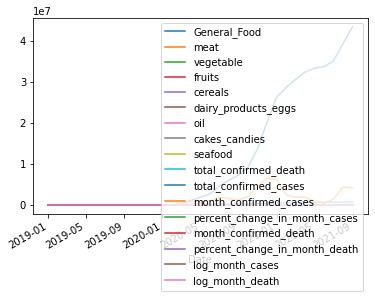

In [80]:
US_CPI_Covid.plot()

Text(0, 0.5, 'CPI')

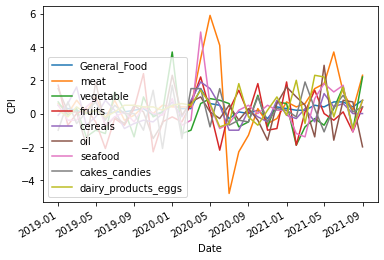

In [107]:
US_select_food = US_CPI_Covid[['General_Food','meat','vegetable','fruits','cereals','oil','seafood', 'cakes_candies', 'dairy_products_eggs']]

US_select_food.plot()
plt.ylabel("CPI")

In [82]:
print(US_select_food)

            General_Food  meat  vegetable  fruits  cereals  oil  seafood  \
Date                                                                       
2019-01-01           0.5   0.6        0.7     1.7     -0.1  1.5      0.5   
2019-02-01           0.3   0.0       -0.1    -0.7      0.6  0.1     -0.4   
2019-03-01           0.2   0.8        0.3     0.0      1.6  0.1     -0.4   
2019-04-01           0.0   0.1       -1.4     0.3     -0.7 -1.9      0.4   
2019-05-01           0.2   1.0       -1.0    -0.5     -0.2  1.9      0.9   
2019-06-01           0.0  -0.3       -1.2    -2.1      0.8 -0.8     -0.7   
2019-07-01           0.1   0.8        1.3    -0.3      0.2 -0.2     -0.2   
2019-08-01           0.1  -0.4        0.2    -0.7     -0.9 -0.6      0.1   
2019-09-01           0.2  -0.1       -1.4     0.3     -0.6  0.5     -0.5   
2019-10-01           0.3   0.4        1.0     2.4     -0.4  0.1      0.4   
2019-11-01          -0.1   0.0       -0.2    -2.3     -0.5 -1.5      0.0   
2019-12-01  

In [83]:
US_select_covid_food = US_select_food.drop(US_select_food.index[range(12)])
US_select_covid_food = US_select_covid_food.drop(US_select_covid_food.index[[21,22,23]])
print(US_select_covid_food)

            General_Food  meat  vegetable  fruits  cereals  oil  seafood  \
Date                                                                       
2020-01-01           0.5   0.4        3.7    -0.2      0.7  2.3      0.9   
2020-02-01           0.3   0.4       -1.2    -0.5     -0.2 -0.1     -0.7   
2020-03-01           0.3   0.4       -1.0     0.6      0.8  0.7     -0.4   
2020-04-01           1.5   3.3        0.6     2.2      1.9  1.0      4.9   
2020-05-01           0.6   5.9        0.9     0.2      1.5  0.1      0.5   
2020-06-01           0.5   4.1        0.8    -2.2      0.5 -0.3     -0.9   
2020-07-01          -0.3  -4.8        0.6     0.2     -1.0  0.5     -0.6   
2020-08-01           0.1  -2.3       -0.8     1.4     -1.0 -0.4      0.2   
2020-09-01           0.0  -1.3       -0.5     0.0      0.2  0.3      0.5   
2020-10-01           0.2   0.3        1.1     1.8     -0.2 -0.4      0.0   
2020-11-01          -0.3  -0.6       -0.8    -1.0     -0.5 -1.6      0.5   
2020-12-01  

<AxesSubplot:xlabel='Date'>

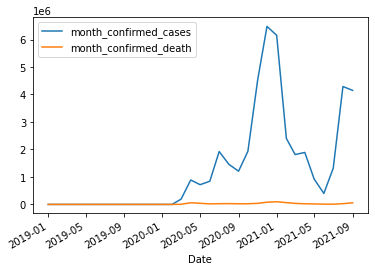

In [84]:
US_select_covid_month = US_CPI_Covid[['month_confirmed_cases', 'month_confirmed_death']]

US_select_covid_month.plot()

Text(0, 0.5, 'log numbers of monthyly cases and death')

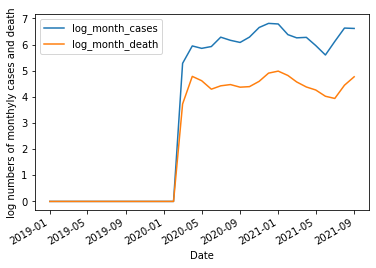

In [85]:
US_select_covid_month = US_CPI_Covid[['log_month_cases', 'log_month_death']]

US_select_covid_month.plot()

plt.ylabel("log numbers of monthyly cases and death")

In [86]:
US_CPI_Covid.columns

Index(['General_Food', 'meat', 'vegetable', 'fruits', 'cereals',
       'dairy_products_eggs', 'oil', 'cakes_candies', 'seafood',
       'total_confirmed_death', 'total_confirmed_cases',
       'month_confirmed_cases', 'percent_change_in_month_cases',
       'month_confirmed_death', 'percent_change_in_month_death',
       'log_month_cases', 'log_month_death'],
      dtype='object')

In [87]:
US_CPI_Covid_selected = US_CPI_Covid.drop(US_CPI_Covid.index[range(12)])
US_CPI_Covid_selected = US_CPI_Covid_selected.drop(US_CPI_Covid_selected.index[[21,22,23]])
print(US_CPI_Covid_selected)

            General_Food  meat  vegetable  fruits  cereals  \
Date                                                         
2020-01-01           0.5   0.4        3.7    -0.2      0.7   
2020-02-01           0.3   0.4       -1.2    -0.5     -0.2   
2020-03-01           0.3   0.4       -1.0     0.6      0.8   
2020-04-01           1.5   3.3        0.6     2.2      1.9   
2020-05-01           0.6   5.9        0.9     0.2      1.5   
2020-06-01           0.5   4.1        0.8    -2.2      0.5   
2020-07-01          -0.3  -4.8        0.6     0.2     -1.0   
2020-08-01           0.1  -2.3       -0.8     1.4     -1.0   
2020-09-01           0.0  -1.3       -0.5     0.0      0.2   
2020-10-01           0.2   0.3        1.1     1.8     -0.2   
2020-11-01          -0.3  -0.6       -0.8    -1.0     -0.5   
2020-12-01           0.4  -0.3        0.7    -0.9      0.8   
2021-01-01           0.3   0.7        0.6     1.9     -0.1   
2021-02-01           0.2   0.4       -1.9    -1.9     -0.3   
2021-03-

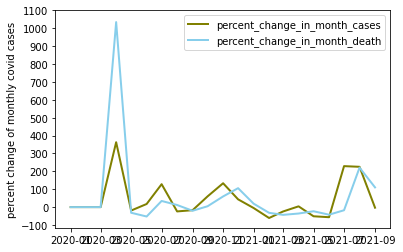

In [88]:
plt.plot('percent_change_in_month_cases', data=US_CPI_Covid_selected, color='olive', linewidth=2)
plt.plot('percent_change_in_month_death', data=US_CPI_Covid_selected, color='skyblue', linewidth=2)
plt.yticks(np.arange(-100, 1200, step=100))  # Set label locations.
plt.ylabel("percent change of monthly covid cases")
plt.legend()
plt.show()

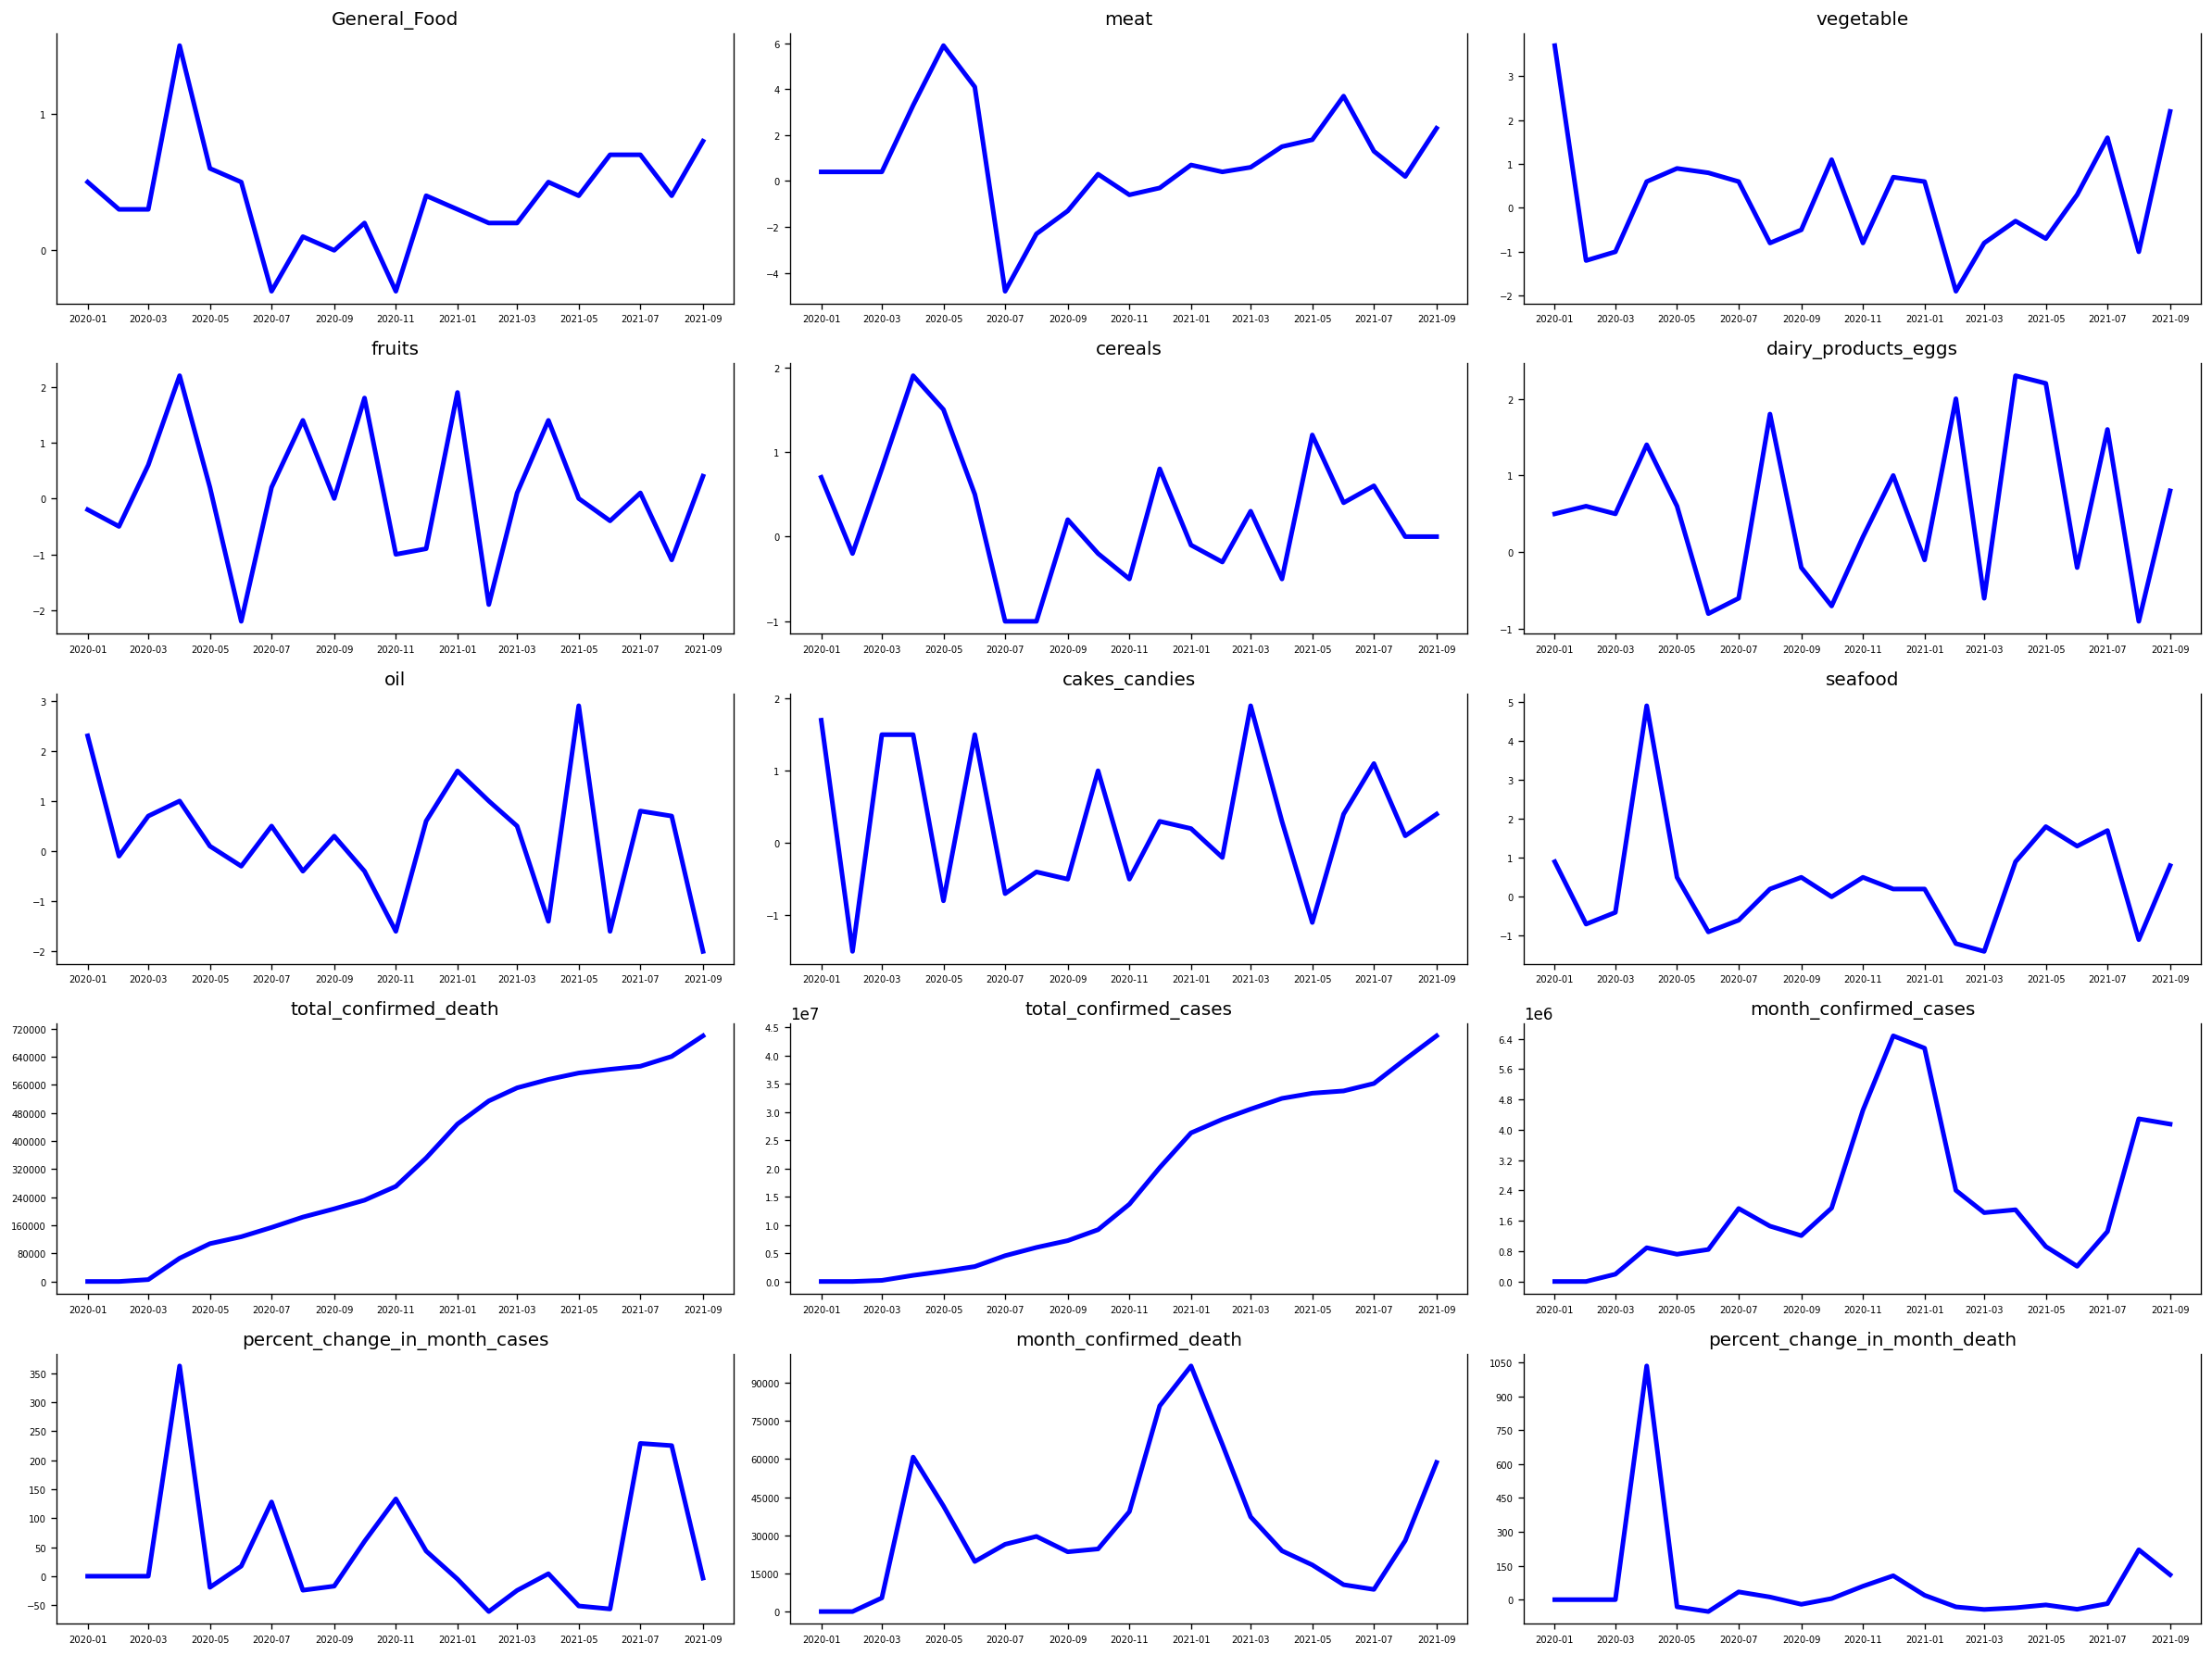

In [89]:
import matplotlib.ticker as ticker
from matplotlib.ticker import MaxNLocator
fig, axes = plt.subplots(nrows=5, ncols=3, dpi=120, figsize=(20,15))
for i, ax in enumerate(axes.flatten()):
 data = US_CPI_Covid_selected[US_CPI_Covid_selected.columns[i]]
 ax.plot(data, color='blue', linewidth=3)
 ax.set_title(US_CPI_Covid_selected.columns[i])
 #ax.xaxis.set_ticks_position('none')
 #ax.yaxis.set_ticks_position('none')
 ax.yaxis.set_major_locator(MaxNLocator(integer=True))
 ax.spines["top"].set_alpha(0)
 ax.tick_params(labelsize=6)
plt.tight_layout();

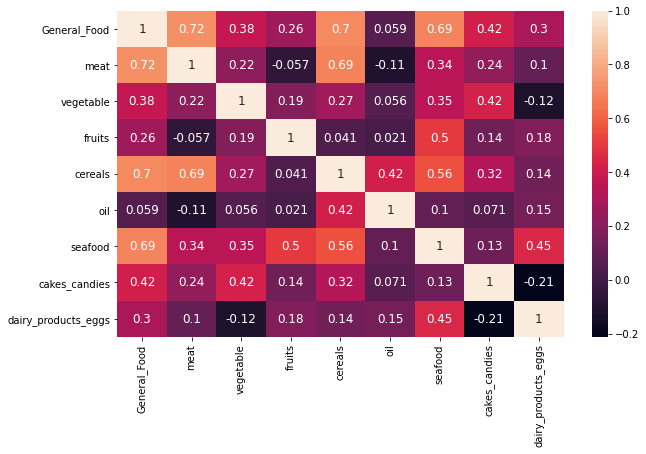

In [90]:
corr = US_select_covid_food.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True, annot_kws={'size':12})
heat_map=plt.gcf()
heat_map.set_size_inches(10,6)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [91]:
stat, p = normaltest(US_CPI_Covid_selected.General_Food)
print("Statistics = %.3f, p=%.3f" % (stat,p))
alpha = 0.05
if p > alpha:
    print('Data looks Gaussian (fail to reject null hypothesis)')
else:
    print('Data looks non-Gaussian (reject null hypothesis')


Statistics = 6.997, p=0.030
Data looks non-Gaussian (reject null hypothesis


In [92]:
#apply adf test on the series
for column in US_CPI_Covid_selected:
    print(column)
    adf_test(US_CPI_Covid_selected[column])
    print()

General_Food
Results of Dickey-Fuller Test
Test Statistic                 -0.202893
p-value                         0.938176
#Lags Used                      7.000000
Number of Observations Used    13.000000
Critical Value (1%)            -4.068854
Critical Value (5%)            -3.127149
Critical Value (10%)           -2.701730
dtype: float64

meat
Results of Dickey-Fuller Test
Test Statistic                 -2.737330
p-value                         0.067798
#Lags Used                      0.000000
Number of Observations Used    20.000000
Critical Value (1%)            -3.809209
Critical Value (5%)            -3.021645
Critical Value (10%)           -2.650713
dtype: float64

vegetable
Results of Dickey-Fuller Test
Test Statistic                -6.314212e+00
p-value                        3.179772e-08
#Lags Used                     0.000000e+00
Number of Observations Used    2.000000e+01
Critical Value (1%)           -3.809209e+00
Critical Value (5%)           -3.021645e+00
Critical Val

/Users/yufeizhao/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1875: FutureWarning:

The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"

/Users/yufeizhao/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


/Users/yufeizhao/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1875: FutureWarning:

The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next releas

In [93]:
#apply kpss test on the series
for column in US_CPI_Covid_selected:
    print(column)
    kpss_test(US_CPI_Covid_selected[column])
    print()

General_Food
Results of KPSS Test:
Result: The series is stationary
Test Statistic           0.169366
p-value                  0.100000
Lags Used                9.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64

meat
Results of KPSS Test:
Result: The series is stationary
Test Statistic           0.187488
p-value                  0.100000
Lags Used                9.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64

vegetable
Results of KPSS Test:
Result: The series is stationary
Test Statistic           0.20487
p-value                  0.10000
Lags Used                9.00000
Critical Value (10%)     0.34700
Critical Value (5%)      0.46300
Critical Value (2.5%)    0.57400
Critical Value (1%)      0.73900
dtype: float64

fruits
Results of KPSS Test:
Result: The series is s

/Users/yufeizhao/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


/Users/yufeizhao/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


/Users/yufeizhao/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


/Users/yufeizhao/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The act

In [94]:
transformed_US_CPI_Covid_selected=US_CPI_Covid_selected.diff().dropna()

for column in transformed_US_CPI_Covid_selected:
    transformed_US_CPI_Covid_selected[column]=signal.detrend(transformed_US_CPI_Covid_selected[column].values)

transformed_US_CPI_Covid_selected

,General_Food,meat,vegetable,fruits,cereals,dairy_products_eggs,oil,cakes_candies,seafood,total_confirmed_death,total_confirmed_cases,month_confirmed_cases,percent_change_in_month_cases,month_confirmed_death,percent_change_in_month_death,log_month_cases,log_month_death
Date,,,,,,,,,,,,,,,,,
2020-02-01,-0.134286,0.052857,-3.998571,-0.33,-0.832857,0.117143,-2.214286,-2.908571,-1.455714,-29266.342857,-9.291881e+05,-2.065324e+05,-13.780985,-4125.771429,-7.580143,-1.023071,-0.734264
2020-03-01,0.057218,0.037293,1.014436,1.07,1.063759,-0.086241,0.988797,3.267594,0.429624,-24508.480451,-8.682632e+05,-1.455208e+04,-12.313164,1358.693985,-7.362233,4.333270,3.047014
2020-04-01,1.248722,2.921729,2.327444,1.57,1.160376,0.910376,0.491880,0.243759,5.414962,30326.381955,-3.026012e+05,4.900863e+05,351.930389,51561.159398,1027.305677,-0.211980,0.424908
2020-05-01,-0.859774,2.606165,0.940451,-2.03,-0.343008,-0.793008,-0.705038,-2.080075,-4.299699,10450.244361,-6.044833e+05,-3.775564e+05,-391.360024,-23024.375188,-1073.076414,-0.897115,-0.743293
2020-06-01,-0.068271,-1.809398,0.453459,-2.43,-0.946391,-1.396391,-0.201955,2.496090,-1.314361,-11979.893233,-6.104664e+05,-8.175608e+04,28.726298,-25452.909774,-27.578504,-0.661854,-0.849478
2020-07-01,-0.776767,-8.924962,0.266466,2.37,-1.449774,0.200226,1.001128,-2.027744,0.370977,-5809.030827,3.388566e+05,8.734513e+05,104.247978,3273.555639,80.469406,-0.300608,-0.344924
2020-08-01,0.414737,2.459474,-1.020526,1.17,0.046842,2.396842,-0.695789,0.448421,0.856316,-3318.168421,-2.570335e+05,-6.718604e+05,-157.250156,-280.978947,-28.982684,-0.705994,-0.373110
2020-09-01,-0.093759,0.943910,0.592481,-1.43,1.243459,-2.006541,0.907293,0.024586,0.341654,-9977.306015,-6.383575e+05,-4.573931e+05,3.505011,-9305.513534,-38.234774,-0.594735,-0.468526
2020-10-01,0.197744,1.528346,1.805489,1.77,-0.359925,-0.509925,-0.489624,1.600752,-0.473008,-9440.443609,-4.266561e+04,5.195243e+05,75.231455,-1984.048120,19.503135,-0.235733,-0.296174


In [95]:
#apply adf test on the series
for column in transformed_US_CPI_Covid_selected:
    print(column)
    adf_test(transformed_US_CPI_Covid_selected[column])
    print()

General_Food
Results of Dickey-Fuller Test
Test Statistic                 -0.919140
p-value                         0.781604
#Lags Used                      8.000000
Number of Observations Used    11.000000
Critical Value (1%)            -4.223238
Critical Value (5%)            -3.189369
Critical Value (10%)           -2.729839
dtype: float64

meat
Results of Dickey-Fuller Test
Test Statistic                 -4.084827
p-value                         0.001026
#Lags Used                      1.000000
Number of Observations Used    18.000000
Critical Value (1%)            -3.859073
Critical Value (5%)            -3.042046
Critical Value (10%)           -2.660906
dtype: float64

vegetable
Results of Dickey-Fuller Test
Test Statistic                 -0.891340
p-value                         0.790811
#Lags Used                      6.000000
Number of Observations Used    13.000000
Critical Value (1%)            -4.068854
Critical Value (5%)            -3.127149
Critical Value (10%)          

/Users/yufeizhao/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1875: FutureWarning:

The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"

/Users/yufeizhao/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


/Users/yufeizhao/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1875: FutureWarning:

The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next releas

Test Statistic                -6.942518e+00
p-value                        1.016513e-09
#Lags Used                     0.000000e+00
Number of Observations Used    1.900000e+01
Critical Value (1%)           -3.832603e+00
Critical Value (5%)           -3.031227e+00
Critical Value (10%)          -2.655520e+00
dtype: float64

log_month_cases
Results of Dickey-Fuller Test
Test Statistic                  2.326280
p-value                         0.998971
#Lags Used                      8.000000
Number of Observations Used    11.000000
Critical Value (1%)            -4.223238
Critical Value (5%)            -3.189369
Critical Value (10%)           -2.729839
dtype: float64

log_month_death
Results of Dickey-Fuller Test
Test Statistic                 -0.388431
p-value                         0.912013
#Lags Used                      8.000000
Number of Observations Used    11.000000
Critical Value (1%)            -4.223238
Critical Value (5%)            -3.189369
Critical Value (10%)           -2.7

/Users/yufeizhao/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1875: FutureWarning:

The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"

/Users/yufeizhao/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


/Users/yufeizhao/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1875: FutureWarning:

The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next releas

In [96]:
#apply kpss test on the series
for column in transformed_US_CPI_Covid_selected:
    print(column)
    kpss_test(transformed_US_CPI_Covid_selected[column])
    print()

General_Food
Results of KPSS Test:
Result: The series is stationary
Test Statistic           0.233183
p-value                  0.100000
Lags Used                9.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64

meat
Results of KPSS Test:
Result: The series is stationary
Test Statistic           0.22868
p-value                  0.10000
Lags Used                9.00000
Critical Value (10%)     0.34700
Critical Value (5%)      0.46300
Critical Value (2.5%)    0.57400
Critical Value (1%)      0.73900
dtype: float64

vegetable
Results of KPSS Test:
Result: The series is stationary
Test Statistic           0.179301
p-value                  0.100000
Lags Used                9.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64

fruits
Results of KPSS Test:
Result: The series is s

/Users/yufeizhao/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


/Users/yufeizhao/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


/Users/yufeizhao/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


/Users/yufeizhao/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The act

In [97]:
for column in transformed_US_CPI_Covid_selected:
    transformed_US_CPI_Covid_selected[column]=US_CPI_Covid_selected[column]-2*US_CPI_Covid_selected[column].shift(1)+US_CPI_Covid_selected[column].shift(2)

In [98]:

transformed_US_CPI_Covid_selected.drop(index=transformed_US_CPI_Covid_selected.index[0], axis=0, inplace=True)
transformed_US_CPI_Covid_selected

,General_Food,meat,vegetable,fruits,cereals,dairy_products_eggs,oil,cakes_candies,seafood,total_confirmed_death,total_confirmed_cases,month_confirmed_cases,percent_change_in_month_cases,month_confirmed_death,percent_change_in_month_death,log_month_cases,log_month_death
Date,,,,,,,,,,,,,,,,,
2020-03-01,2.000000e-01,0.0,5.1,1.4,1.9,-0.2,3.2,6.2,1.9,5359.0,192079.0,192079.0,0.000000,5359.0,0.00,5.283480,3.729084
2020-04-01,1.200000e+00,2.9,1.4,0.5,0.1,1.0,-0.5,-3.0,5.0,55436.0,696816.0,504737.0,362.775733,50077.0,1034.45,-4.618109,-2.674300
2020-05-01,-2.100000e+00,-0.3,-1.3,-3.6,-1.5,-1.7,-1.2,-2.3,-9.7,-19275.0,-170728.0,-867544.0,-744.758234,-74711.0,-2100.60,-0.757996,-1.220395
2020-06-01,8.000000e-01,-4.4,-0.4,-0.4,-0.6,-0.6,0.5,4.6,3.0,-21829.0,125171.0,295899.0,418.618502,-2554.0,1045.28,0.162401,-0.158379
2020-07-01,-7.000000e-01,-7.1,-0.1,4.8,-0.5,1.6,1.2,-4.5,1.7,6772.0,1080477.0,955306.0,74.053859,28601.0,107.83,0.288385,0.452361
2020-08-01,1.200000e+00,11.4,-1.2,-1.2,1.5,2.2,-1.7,2.5,0.5,3092.0,-464736.0,-1545213.0,-262.965954,-3680.0,-109.67,-0.478246,-0.080379
2020-09-01,-5.000000e-01,-1.5,1.7,-2.6,1.2,-4.4,1.6,-0.4,-0.5,-6058.0,-250170.0,214566.0,159.287347,-9150.0,-9.47,0.038399,-0.147610
2020-10-01,3.000000e-01,0.6,1.3,3.2,-1.6,1.5,-1.4,1.6,-0.8,1138.0,726846.0,977016.0,70.258623,7196.0,57.52,0.286142,0.120159
2020-11-01,-7.000000e-01,-2.5,-3.5,-4.6,0.1,1.4,-0.5,-3.0,1.0,14677.0,2580994.0,1854148.0,-4.061325,13539.0,29.40,0.163519,0.182432


In [99]:
for column in transformed_US_CPI_Covid_selected:
    print(column)
    adf_test(transformed_US_CPI_Covid_selected[column])
    print()

General_Food
Results of Dickey-Fuller Test
Test Statistic                 -1.916782
p-value                         0.324208
#Lags Used                      7.000000
Number of Observations Used    11.000000
Critical Value (1%)            -4.223238
Critical Value (5%)            -3.189369
Critical Value (10%)           -2.729839
dtype: float64

meat
Results of Dickey-Fuller Test
Test Statistic                 -4.695756
p-value                         0.000086
#Lags Used                      2.000000
Number of Observations Used    16.000000
Critical Value (1%)            -3.924019
Critical Value (5%)            -3.068498
Critical Value (10%)           -2.673893
dtype: float64

vegetable
Results of Dickey-Fuller Test
Test Statistic                 -1.143747
p-value                         0.697315
#Lags Used                      7.000000
Number of Observations Used    11.000000
Critical Value (1%)            -4.223238
Critical Value (5%)            -3.189369
Critical Value (10%)          

/Users/yufeizhao/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1875: FutureWarning:

The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"

/Users/yufeizhao/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


/Users/yufeizhao/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1875: FutureWarning:

The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next releas

Test Statistic                 -3.374510
p-value                         0.011859
#Lags Used                      2.000000
Number of Observations Used    16.000000
Critical Value (1%)            -3.924019
Critical Value (5%)            -3.068498
Critical Value (10%)           -2.673893
dtype: float64

dairy_products_eggs
Results of Dickey-Fuller Test
Test Statistic                  0.865254
p-value                         0.992620
#Lags Used                      6.000000
Number of Observations Used    12.000000
Critical Value (1%)            -4.137829
Critical Value (5%)            -3.154972
Critical Value (10%)           -2.714477
dtype: float64

oil
Results of Dickey-Fuller Test
Test Statistic                 -4.644709
p-value                         0.000107
#Lags Used                      3.000000
Number of Observations Used    15.000000
Critical Value (1%)            -3.964443
Critical Value (5%)            -3.084908
Critical Value (10%)           -2.681814
dtype: float64

cakes_c

/Users/yufeizhao/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1875: FutureWarning:

The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"

/Users/yufeizhao/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


/Users/yufeizhao/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1875: FutureWarning:

The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next releas

In [103]:
from scipy import signal
transformed_US_CPI_Covid_selected['food2']=signal.detrend(transformed_US_CPI_Covid_selected['General_Food'])
transformed_US_CPI_Covid_selected['vegetable2']=signal.detrend(transformed_US_CPI_Covid_selected['vegetable'])
transformed_US_CPI_Covid_selected['cakes_candies2']=signal.detrend(transformed_US_CPI_Covid_selected['cakes_candies'])
transformed_US_CPI_Covid_selected['dairy_products_eggs2']=signal.detrend(transformed_US_CPI_Covid_selected['dairy_products_eggs'])
transformed_US_CPI_Covid_selected['month_confirmed_cases2']=signal.detrend(transformed_US_CPI_Covid_selected['month_confirmed_cases'])
adf_test(transformed_US_CPI_Covid_selected['food2'])
adf_test(transformed_US_CPI_Covid_selected['vegetable2'])
adf_test(transformed_US_CPI_Covid_selected['cakes_candies2'])
adf_test(transformed_US_CPI_Covid_selected['dairy_products_eggs2'])
adf_test(transformed_US_CPI_Covid_selected['month_confirmed_cases2'])

Results of Dickey-Fuller Test
Test Statistic                 -1.347895
p-value                         0.606986
#Lags Used                      7.000000
Number of Observations Used    11.000000
Critical Value (1%)            -4.223238
Critical Value (5%)            -3.189369
Critical Value (10%)           -2.729839
dtype: float64
Results of Dickey-Fuller Test
Test Statistic                -7.280000e+00
p-value                        1.509109e-10
#Lags Used                     1.000000e+00
Number of Observations Used    1.700000e+01
Critical Value (1%)           -3.889266e+00
Critical Value (5%)           -3.054358e+00
Critical Value (10%)          -2.666984e+00
dtype: float64
Results of Dickey-Fuller Test
Test Statistic                  2.149966
p-value                         0.998839
#Lags Used                      7.000000
Number of Observations Used    11.000000
Critical Value (1%)            -4.223238
Critical Value (5%)            -3.189369
Critical Value (10%)           -2.72983

/Users/yufeizhao/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1875: FutureWarning:

The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"

/Users/yufeizhao/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


/Users/yufeizhao/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1875: FutureWarning:

The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next releas

In [104]:
grangers_causality_matrix(transformed_US_CPI_Covid_selected, variables = transformed_US_CPI_Covid_selected.columns) 

,General_Food_x,meat_x,vegetable_x,fruits_x,cereals_x,dairy_products_eggs_x,oil_x,cakes_candies_x,seafood_x,total_confirmed_death_x,...,percent_change_in_month_cases_x,month_confirmed_death_x,percent_change_in_month_death_x,log_month_cases_x,log_month_death_x,food2_x,vegetable2_x,cakes_candies2_x,dairy_products_eggs2_x,month_confirmed_cases2_x
General_Food_y,1.0000,0.1392,0.0000,0.0029,0.0166,0.0105,0.5467,0.0413,0.0057,0.0886,...,0.0282,0.2556,0.0000,0.0000,0.0000,0.5133,0.0000,0.0963,0.0164,0.4067
meat_y,0.0001,1.0000,0.8897,0.0003,0.0007,0.0297,0.1687,0.0071,0.0000,0.0810,...,0.0000,0.0038,0.0000,0.0000,0.0000,0.0001,0.8789,0.0095,0.0400,0.5434
vegetable_y,0.1216,0.0233,1.0000,0.0113,0.0000,0.0507,0.0399,0.1108,0.0933,0.2762,...,0.2159,0.4493,0.3366,0.0037,0.0035,0.1209,0.7427,0.1162,0.0625,0.5778
fruits_y,0.0000,0.0001,0.0000,1.0000,0.0000,0.1151,0.2070,0.0584,0.0000,0.0017,...,0.4615,0.0042,0.0034,0.0236,0.0053,0.0000,0.0000,0.0518,0.1499,0.2921
cereals_y,0.0207,0.0102,0.0028,0.0000,1.0000,0.0000,0.0436,0.2858,0.0000,0.1439,...,0.0499,0.1857,0.0000,0.0067,0.0130,0.0188,0.0017,0.2879,0.0000,0.0406
dairy_products_eggs_y,0.0033,0.0008,0.0027,0.0000,0.0000,1.0000,0.0007,0.1798,0.0024,0.0439,...,0.0448,0.0000,0.0205,0.0934,0.0614,0.0031,0.0011,0.1727,0.9743,0.0060
oil_y,0.1849,0.6132,0.4161,0.0371,0.7386,0.0008,1.0000,0.4951,0.1686,0.0073,...,0.4478,0.0048,0.6160,0.1856,0.3835,0.1828,0.4310,0.4820,0.0007,0.0000
cakes_candies_y,0.0050,0.0496,0.0306,0.0013,0.3245,0.2326,0.0025,1.0000,0.0000,0.0503,...,0.0000,0.0025,0.0005,0.0143,0.0463,0.0049,0.0290,0.8422,0.2319,0.0004
seafood_y,0.0277,0.0293,0.0080,0.3289,0.0001,0.1409,0.0000,0.0046,1.0000,0.0110,...,0.0059,0.0017,0.2287,0.0000,0.0000,0.0286,0.0119,0.0042,0.1343,0.3209
total_confirmed_death_y,0.0025,0.2675,0.0145,0.0001,0.1761,0.2195,0.1062,0.1164,0.0008,1.0000,...,0.1774,0.0982,0.0433,0.0000,0.0000,0.0019,0.0181,0.1110,0.2792,0.0005
